In [ ]:
# import tensorflow as tf
# import tensorflow.keras as keras
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import *

import math
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.io import savemat
from scipy import interpolate
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy.matlib
from scipy.special import expit

import time
import os
plt.rcParams['figure.figsize'] = [6, 4] 

# Pictures Describing Copulas

In [246]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

# ax1.plot(X[:,0],X[:,1], 'o')
# ax1.set_title('Scatter plot')
# ax1.set_xlabel('X1')
# ax1.set_ylabel('X2')


# # Plot the first histogram
# ax2.hist(X[:,0], bins=30, edgecolor='black')
# ax2.set_title('Histogram 1')
# ax2.set_xlabel('X1')
# ax2.set_ylabel('Frequency')

# # Plot the second histogram
# ax3.hist(X[:,1], bins=30, edgecolor='black')
# ax3.set_title('Histogram 2')
# ax3.set_xlabel('X2')
# ax3.set_ylabel('Frequency')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()

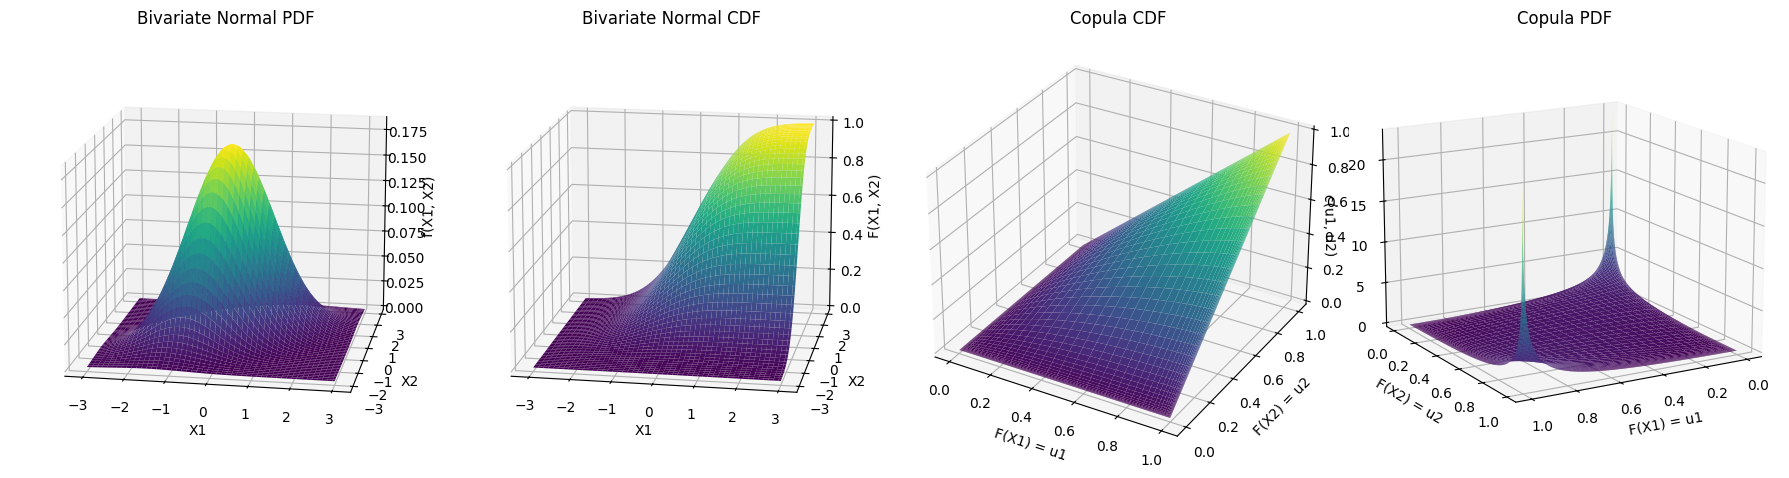

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Create a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Create the bivariate normal distribution for PDF
rv_pdf = multivariate_normal(mean, cov)
z_pdf = rv_pdf.pdf(pos)

# Create the bivariate normal distribution for CDF
rv_cdf = multivariate_normal(mean, cov)
z_cdf = rv_cdf.cdf(pos)

# Create the figure and subplots
fig = plt.figure(figsize=(18, 5))

# Plot the PDF surface
ax1 = fig.add_subplot(141, projection='3d')
ax1.plot_surface(x, y, z_pdf, cmap='viridis')
ax1.set_title('Bivariate Normal PDF')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('f(X1, X2)')
ax1.view_init(elev=15, azim=280, roll=0)

# Plot the CDF surface
ax2 = fig.add_subplot(142, projection='3d')
ax2.plot_surface(x, y, z_cdf, cmap='viridis')
ax2.set_title('Bivariate Normal CDF')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')
ax2.view_init(elev=15, azim=280, roll=0)

#Plot of the copula function
#create a grid of (u_x, u_y) points ie the unit square
u_x = norm.cdf(x)
u_y = norm.cdf(y)

ax3 = fig.add_subplot(143, projection='3d')
ax3.plot_surface(u_x, u_y, z_cdf, cmap='viridis')
ax3.set_title('Copula CDF')
ax3.set_xlabel('F(X1) = u1')
ax3.set_ylabel('F(X2) = u2')
ax3.set_zlabel('C(u1, u2)')


# Copula PDF function
c_pdf = z_pdf / (norm.pdf(x) * norm.pdf(y))

ax4 = fig.add_subplot(144, projection='3d')
ax4.plot_surface(u_x, u_y, c_pdf, cmap= 'viridis')
ax4.set_title('Copula PDF')
ax4.set_xlabel('F(X1) = u1')
ax4.set_ylabel('F(X2) = u2')
ax4.set_zlabel('c(u1, u2)')
ax4.view_init(elev=15, azim=60, roll=0)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#!pip install imageio[ffmpeg]


   ---------------------------------------- 0.0/31.2 MB ? eta -:--:--
   --------------------- ------------------ 16.8/31.2 MB 81.4 MB/s eta 0:00:01
   ---------------------------------------  30.7/31.2 MB 72.1 MB/s eta 0:00:01
   ---------------------------------------- 31.2/31.2 MB 58.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

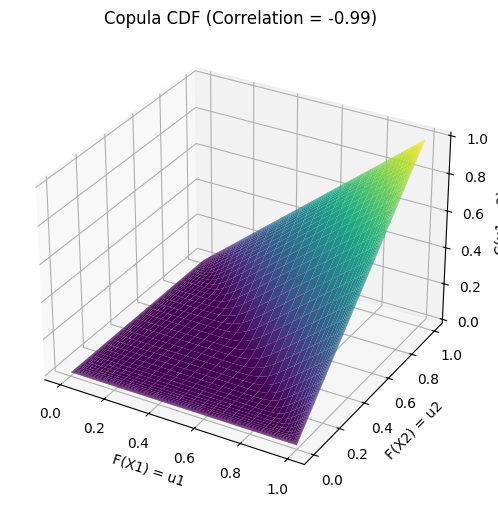

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal, norm
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter

# Create a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Create figure
fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')

# Function to update animation
def update(frame):
    ax3.clear()  # Clear previous frame

    # Define dynamic correlation (frame varies from -0.99 to 0.99)
    rho = np.linspace(-0.99, 0.99, 100)[frame]
    cov = [[1, rho], [rho, 1]]  # Covariance matrix

    # Compute Copula CDF
    rv_cdf = multivariate_normal(mean=[0, 0], cov=cov)
    z_cdf = rv_cdf.cdf(pos)

    # Transform to uniform marginals
    u_x = norm.cdf(x)
    u_y = norm.cdf(y)

    # Plot the updated surface
    ax3.plot_surface(u_x, u_y, z_cdf, cmap='viridis')
    ax3.set_title(f'Copula CDF (Correlation = {rho:.2f})')
    ax3.set_xlabel('F(X1) = u1')
    ax3.set_ylabel('F(X2) = u2')
    ax3.set_zlabel('C(u1, u2)')

# Create animation
#ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=False)
ani = animation.FuncAnimation(fig, update, frames=100, interval=25, blit=False, cache_frame_data=False)

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())



#### # Save the animation as a .mp4 file
#ani.save("animation.mp4", writer="ffmpeg", fps=40)


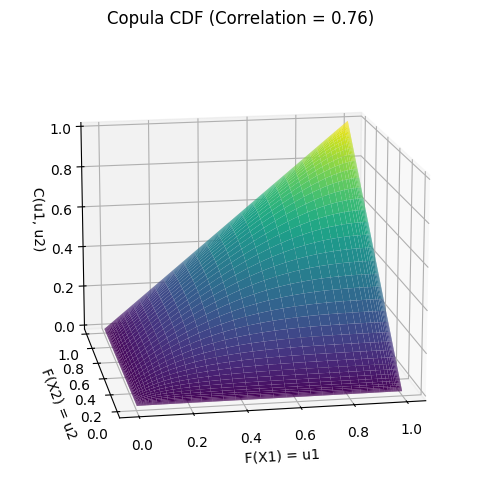

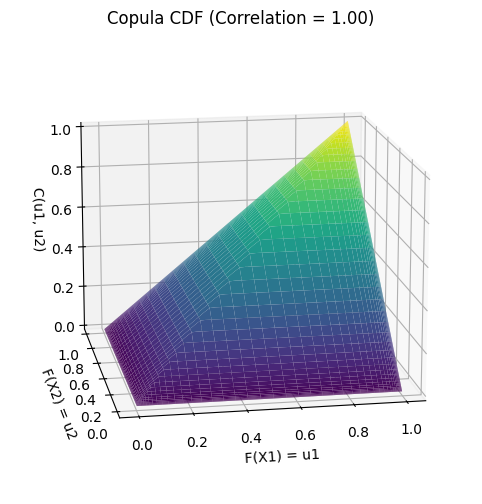

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Create a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Function to create the plot for a given correlation
def create_copula_plot(rho):
    # Covariance matrix
    cov = [[1, rho], [rho, 1]]
    
    # Compute Copula CDF
    rv_cdf = multivariate_normal(mean=[0, 0], cov=cov)
    z_cdf = rv_cdf.cdf(pos)

    # Transform to uniform marginals
    u_x = norm.cdf(x)
    u_y = norm.cdf(y)

    # Create figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(u_x, u_y, z_cdf, cmap='viridis')
    ax.set_title(f'Copula CDF (Correlation = {rho:.2f})')
    ax.set_xlabel('F(X1) = u1')
    ax.set_ylabel('F(X2) = u2')
    ax.set_zlabel('C(u1, u2)')
    ax.view_init(elev=15, azim=260, roll=0)
    plt.show()

# Generate plot for rho = 0.99
create_copula_plot(0.76)

# Generate plot for rho = -0.99
create_copula_plot(0.9999)


In figure above the x1,x2 space is transformed to a u1,u2 space. In this space the height of the CDF is the same for the copula and Normal CDF. The copula is however on the [0,1] domain. The two middle plots have the same height for corresponding points. However since the copula uses the transformed values through each marginal $F_i(x_i)$. This is a nonlinear transformation so it does not look like they are the same.  

Sklars theorem states that given any joint distribution $F(x_1,x_2)$ there is a unique copula function such that $F(x_1,x_2) = C(F_1(x_1), F_2(x_2))$. Here $F_i(x_i) = u_i$

differentiating both sides gives that $ f(x_1,x_2) = f_1(x_1)f_2(x_2)c(F_1(x_1), F_2(x_2))$. 

Hence the copula pdf can be written as $ c(F_1(x_1), F_2(x_2)) = \frac{\partial^2C(F_1(x_1),F_2(x_2))}{\partial F_1(x_1)\partial F_2(x_2)} =\frac{f(x_1,x_2)}{(f_1(x_1)f_2(x_2))}$?


# Frechet bounds

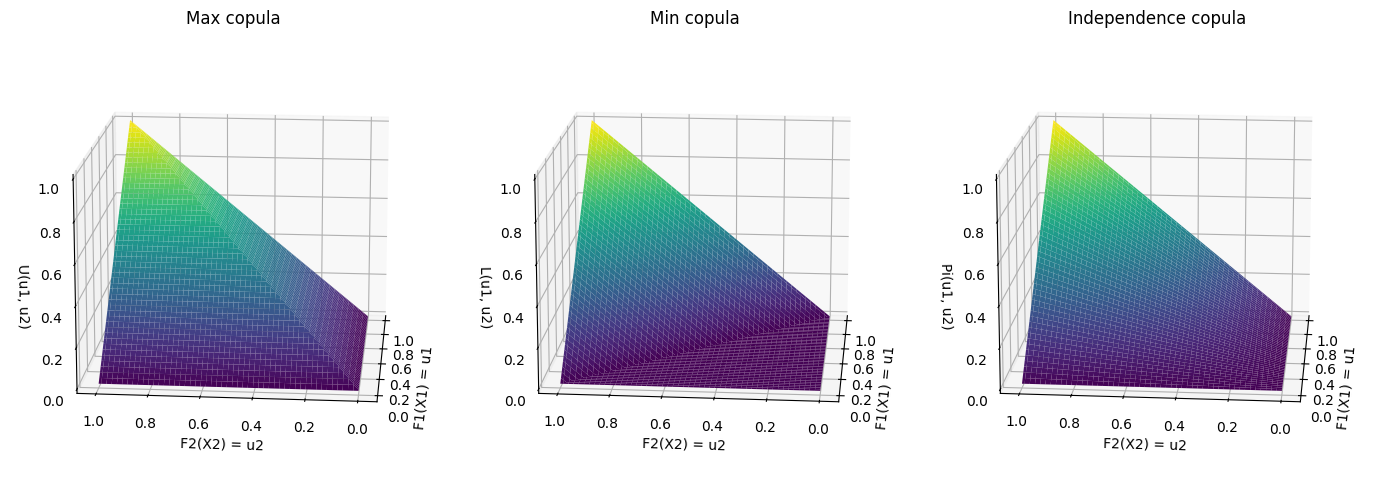

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the unit square
u1 = np.linspace(0, 1, 100)
u2 = np.linspace(0, 1, 100)

# Create a meshgrid
U1, U2 = np.meshgrid(u1, u2)

# Calculate the maximum and minimum of the two numbers at each point in the grid
Zmax = np.maximum(U1 + U2 - 1,0)
Zmin = np.minimum(U1, U2)
Z_indep = U1* U2

# Create a figure and subplots
fig = plt.figure(figsize=(14, 6))

ax3 = fig.add_subplot(131, projection='3d')
surf_min = ax3.plot_surface(U1, U2, Zmin, cmap='viridis')
#fig.colorbar(surf_min, ax=ax3, shrink=0.5, aspect=5)
ax3.set_title('Max copula')
ax3.set_xlabel('F1(X1) = u1')
ax3.set_ylabel('F2(X2) = u2')
ax3.set_zlabel('U(u1, u2)')

ax4 = fig.add_subplot(132, projection='3d')
surf_max = ax4.plot_surface(U1, U2, Zmax, cmap='viridis')
#fig.colorbar(surf_max, ax=ax4, shrink=0.5, aspect=5)
ax4.set_title('Min copula')
ax4.set_xlabel('F1(X1) = u1')
ax4.set_ylabel('F2(X2) = u2')
ax4.set_zlabel('L(u1, u2)')

ax5 = fig.add_subplot(133, projection='3d')
surf_indep = ax5.plot_surface(U1, U2, Z_indep, cmap='viridis')
#fig.colorbar(surf_indep, ax=ax5, shrink=0.5, aspect=5)
ax5.set_title('Independence copula')
ax5.set_xlabel('F1(X1) = u1')
ax5.set_ylabel('F2(X2) = u2')
ax5.set_zlabel('Pi(u1, u2)')

# Set the view angle for both plots
ax3.view_init(elev=15, azim=185, roll=0)
ax4.view_init(elev=15, azim=185, roll=0)
ax5.view_init(elev=15, azim=185, roll=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

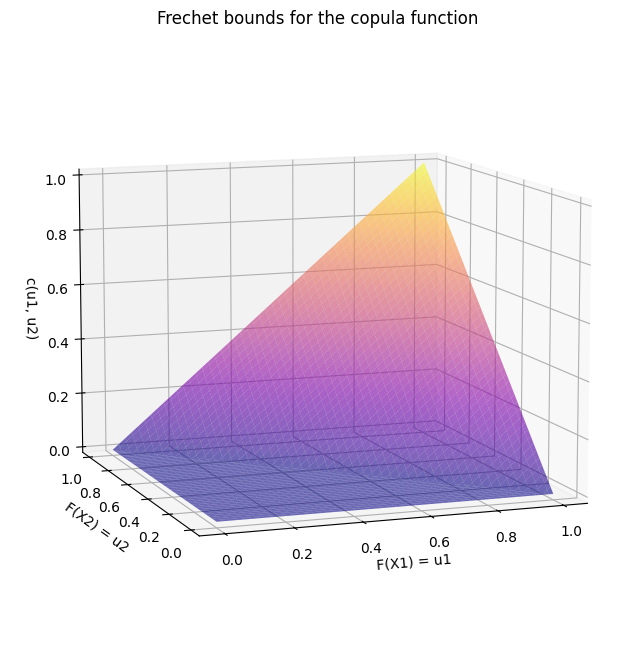

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the unit square
u1 = np.linspace(0, 1, 100)
u2 = np.linspace(0, 1, 100)

# Create a meshgrid
U1, U2 = np.meshgrid(u1, u2)

# Calculate the maximum and minimum of the two numbers at each point in the grid
Zmax = np.maximum(U1 + U2 - 1,0) 
Zmin = np.minimum(U1, U2)

# Create a figure and a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface for minimum
#surf_min = ax.plot_surface(U1, U2, Zmin, cmap='viridis', alpha=0.6)

# Plot the surface for maximum
surf_max = ax.plot_surface(U1, U2, Zmax, cmap='plasma', alpha=0.6)

# Add color bars which map values to colors
#fig.colorbar(surf_min, ax=ax, shrink=0.5, aspect=5)
#fig.colorbar(surf_max, ax=ax, shrink=0.5, aspect=5)

# Set titles and labels
ax.set_title('Frechet bounds for the copula function')
ax.set_xlabel('F(X1) = u1')
ax.set_ylabel('F(X2) = u2')
ax.set_zlabel('C(u1, u2)')

# Set the view angle
ax.view_init(elev=10, azim=-110, roll=0)

# Show the plot
plt.show()



# Simulating processes

## 1) Uncorrelated Gaussian

System: 

$dS_t^1 = \mu_1 S_t^1 dt + \sigma_1 S_t^1 dW_t^1,  S_0^1 = s_0^1$   

$dS_t^2 = \mu_2 S_t^2 dt+ \sigma_2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$W_t^1  \perp\!\!\!\perp W_t^2$

<!-- Solution:

$S_t^1 = S_0^1 \mathrm{exp}\{(r-\frac{\sigma_1^2}{2})t + \sigma_1 W_t^1\} $

$S_t^2 = S_0^2 \mathrm{exp}\{(r-\frac{\sigma_2^2}{2})t + \sigma_2 W_t^2\} $ -->


Euler-Maruyama discretization: (For one stock)

- Initialize:
    Solve the SDE
    Set $Y_0^i = S_0^i$

- Iterate over time partitions:
    $Y_{n+1}^i = Y_n^i +\alpha Y_n^i \Delta t + \beta Y_n^i \Delta W_n^i, $ where  $\alpha = \mu S_t^i, \beta = \sigma_i S_t^i $ 
    


<!-- 
$S_{t_{i+1}}^1 = S_{t_{i}}^1 \mathrm{exp}\{(r-\frac{\sigma_1^2}{2})(t_{i+1}-t_{i}) + \sigma_1 (W_{t_{i+1}}^1 - W_{t_{i}}^1) \} $
$\Rightarrow  S_{t_{i+1}}^1 = S_{t_{i}}^1 \mathrm{exp}\{(r-\frac{\sigma_1^2}{2})(t_{i+1}-t_{i}) + \sqrt{t_{i+1}-t_{i}} \sigma_1 Z_{i+1}^1  \}$ 



$S_{t_{i+1}}^2 = S_{t_{i}}^2 \mathrm{exp}\{(r-\frac{\sigma_2^2}{2})(t_{i+1}-t_{i}) + \sigma_2 (W_{t_{i+1}}^2 - W_{t_{i}}^2) \} $
$\Rightarrow  S_{t_{i+1}}^2 = S_{t_{i}}^2 \mathrm{exp}\{(r-\frac{\sigma_2^2}{2})(t_{i+1}-t_{i}) + \sqrt{t_{i+1}-t_{i}} \sigma_2 Z_{i+1}^2  \}$ 
 -->



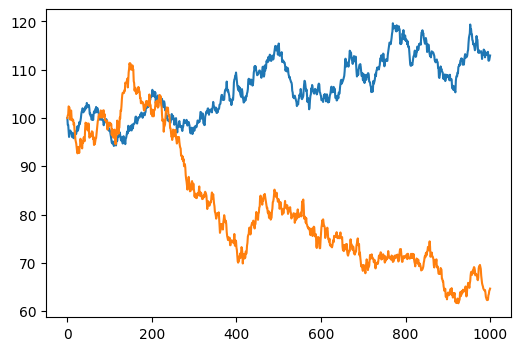

In [4]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]


def eulerMaruyama(s_0, Z, mu, sigma, dt):
    stocks = s_0.shape[0]
    timeSteps = Z.shape[0]
    S = s_0 * np.ones((timeSteps+1, stocks))
    
    for t in range(1, timeSteps+1):

        S[t, :] =  (S[t-1, :] + S[t-1, :]* mu * dt + S[t-1, :]*sigma * np.sqrt(dt) * Z[t-1, :])
    return S

Z = np.random.standard_normal((Timesteps, stocks))
S = eulerMaruyama(s_0, Z, mu, sigma, dt)
plt.plot(S) 



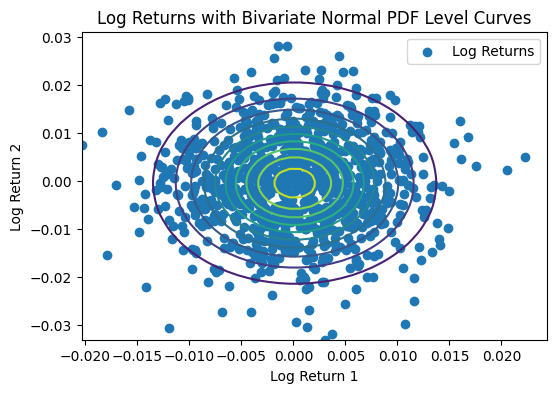

mean: [ 0.00012159 -0.00043589]
correlation: -0.0023325637699841795


In [5]:
def logReturns(S):
    logReturns = np.log(S[1:,:] / S[:-1,:])
    return logReturns

# Assuming S is already defined and contains the simulated stock prices
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()


print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

## 2) Correlated Gaussian


System: 

$dS_t^1 = \mu_1 S_t^1 dt + \sigma_1 S_t^1 dW_t^1,  S_0^1 = s_0^1$   

$dS_t^2 = \mu_2 S_t^2 dt+ \sigma_2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$ \langle  W_t^1,  W_t^2 \rangle = \delta t$



Euler-Maruyama discretization: (For one stock)

- Initialize:
    Solve the SDE
    Set $Y_0^i = S_0^i$

- Iterate over time partitions:
    $Y_{n+1}^i = Y_n^i +\alpha Y_n^i \Delta t + \beta Y_n^i \Delta W_n^i, $ where  $\alpha = \mu S_t^i, \beta = \sigma_i S_t^i $ 


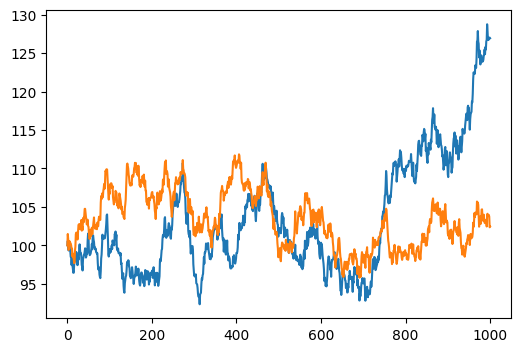

In [6]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]; rho = 0.7

## Create correlation matrix
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)
Z = np.random.standard_normal((Timesteps, stocks)) 
X = Z @ A

S = eulerMaruyama(s_0, X, mu, sigma, dt)
plt.plot(S) 

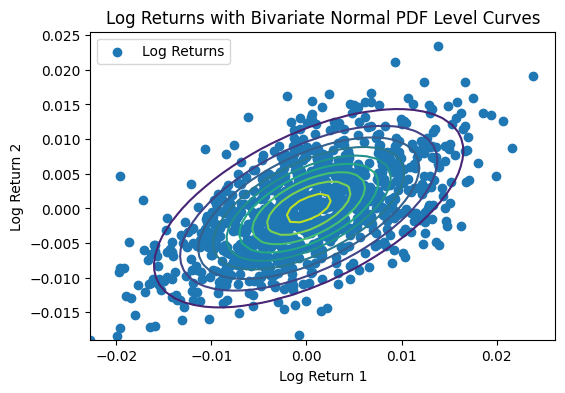

mean: [2.38492831e-04 2.39957757e-05]
correlation: 0.579385854032954


In [7]:
# Calculate log returns
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()

print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

## 3) Mixed drift terms but uncorrelated brownian motions

System: 

$dS_t^1 = \mu^1 S_t^1 dt + \sigma^1 S_t^1 dW_t^1,  S_0^1 = s_0^1$ 
    
$dS_t^2 = \mu^2 S_t^1 dt+ \sigma^2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$W_t^1  \perp\!\!\!\perp W_t^2$




Solution:



Euler-Maruyama discretization:



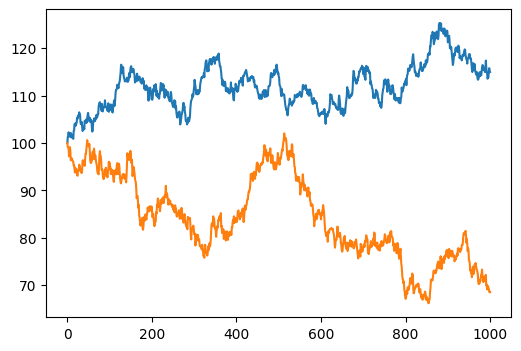

In [16]:
def eulerMaruyamaMixedDrift(s_0, Z, mu, sigma, dt):
    stocks = s_0.shape[0]
    timeSteps = Z.shape[0]
    S = s_0 * np.ones((timeSteps+1, stocks))
    
    for t in range(1, timeSteps+1):

        S[t, 0] =  (S[t-1, 0] + S[t-1, 0]* mu[0] * dt + S[t-1, 0]*sigma[0] * np.sqrt(dt) * Z[t-1, 0])
        S[t, 1] =  (S[t-1, 1] + np.sqrt(S[t-1, 0]*S[t-1, 1])* mu[1] * dt + np.sqrt(S[t-1, 0]*S[t-1, 1])*sigma[1] * np.sqrt(dt) * Z[t-1, 1])
    return S

s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]  #; rho = 0.7
Z = np.random.standard_normal((Timesteps, stocks)) 

S = eulerMaruyamaMixedDrift(s_0, Z, mu, sigma, dt)
plt.plot(S) 


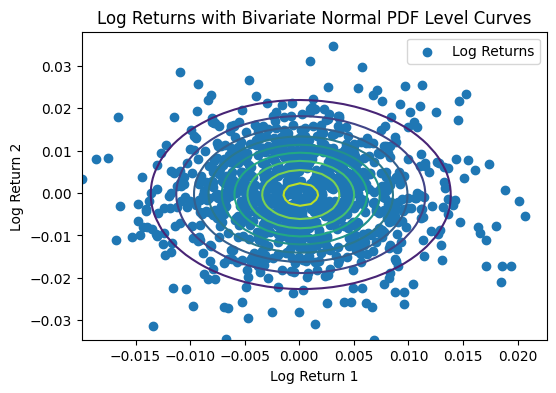

mean: [ 0.00013949 -0.00037748]
correlation: -0.00663004061122725


In [17]:
# Calculate log returns
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()


print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

## 4) Mixed drift terms and correlated brownian motions

System: 

$dS_t^1 = \mu^1 S_t^1 dt + \sigma^1 S_t^1 dW_t^1,  S_0^1 = s_0^1$ 
    
$dS_t^2 = \mu^2 S_t^1 dt+ \sigma^2 S_t^2 dW_t^2,  S_0^2 = s_0^2$ 

$ \langle  W_t^1,  W_t^2 \rangle = \delta t$





Solution:



Euler-Maruyama discretization:



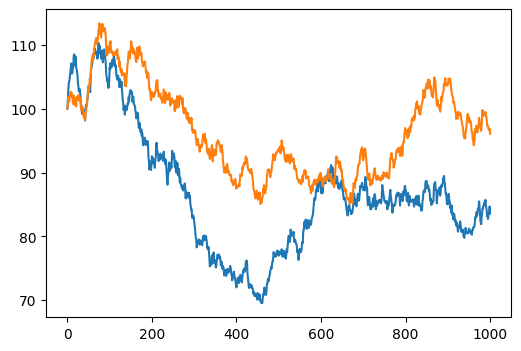

In [44]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]  #; rho = 0.7

## Create correlation matrix
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)
np.random.seed(0)
Z = np.random.standard_normal((Timesteps, stocks)) 
X = Z @ A

S = eulerMaruyamaMixedDrift(s_0, X, mu, sigma, dt)
plt.plot(S) 

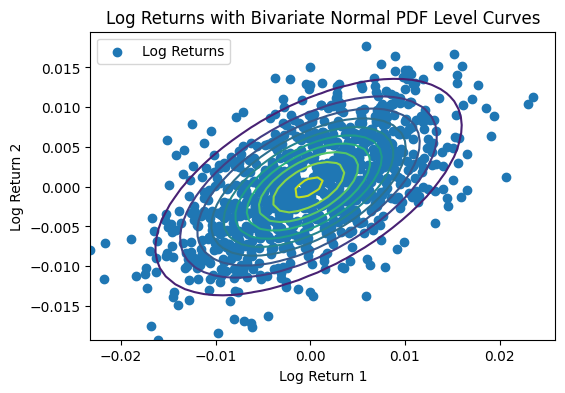

mean: [-1.79399532e-04 -4.02145333e-05]
correlation: 0.5681445840559143


In [45]:
# Calculate log returns
logR = logReturns(S)

# Estimate mean vector and covariance matrix
mean_vector = np.mean(logR, axis=0)
cov_matrix = np.cov(logR, rowvar=False)
corr_matrix = np.corrcoef(logR, rowvar=False)
# Create a grid of points
x, y = np.mgrid[logR[:,0].min():logR[:,0].max():.001, logR[:,1].min():logR[:,1].max():.001]
pos = np.dstack((x, y))

# Create a multivariate normal distribution based on the estimated mean and covariance
rv = multivariate_normal(mean_vector, cov_matrix)

# Plot the scatter plot of log returns
plt.scatter(logR[:,0], logR[:,1], label='Log Returns')

# Plot the level curves of the bivariate normal pdf
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')

plt.xlabel('Log Return 1')
plt.ylabel('Log Return 2')
plt.title('Log Returns with Bivariate Normal PDF Level Curves')
plt.legend()
plt.show()


print('mean:', mean_vector)
print('correlation:', corr_matrix[0,1])

# Exploring the scale invariance of the copula 

In [57]:
# !pip install seaborn

C:\Users\JohanHerbert\AppData\Local\Temp\ipykernel_8968\1568571871.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(logR[:, i], label=f'Column {i+1}', shade=True)
C:\Users\JohanHerbert\AppData\Local\Temp\ipykernel_8968\1568571871.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(logR[:, i], label=f'Column {i+1}', shade=True)


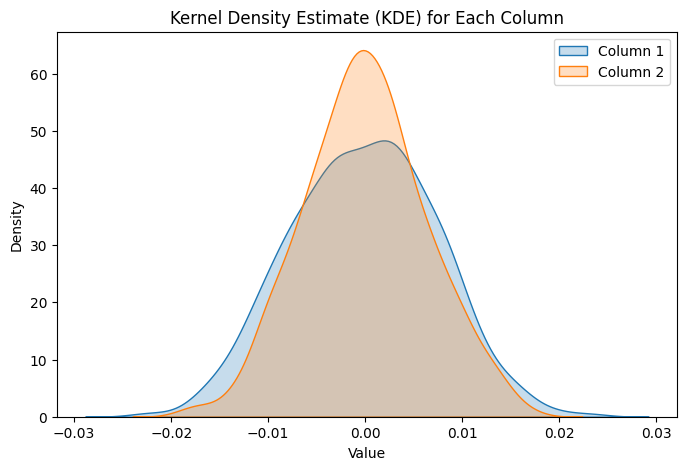

In [52]:

# Create a figure for the plots
plt.figure(figsize=(8, 5))

# Plot KDE for each column in the array
for i in range(logR.shape[1]):
    sns.kdeplot(logR[:, i], label=f'Column {i+1}', shade=True)

# Add labels and a legend
plt.title('Kernel Density Estimate (KDE) for Each Column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


C:\Users\JohanHerbert\AppData\Local\Temp\ipykernel_8968\173236225.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(logR_squashed[:, i], label=f'Column {i+1}', shade=True)
C:\Users\JohanHerbert\AppData\Local\Temp\ipykernel_8968\173236225.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(logR_squashed[:, i], label=f'Column {i+1}', shade=True)


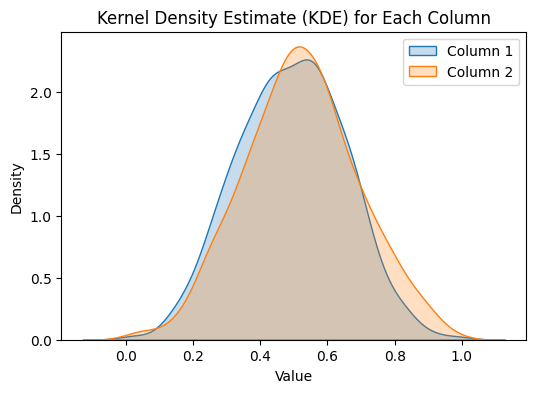

In [56]:
logR_squashed = (logR - np.min(logR, axis=0))/(np.max(logR, axis=0) - np.min(logR, axis=0))
for i in range(logR_squashed.shape[1]):
    sns.kdeplot(logR_squashed[:, i], label=f'Column {i+1}', shade=True)

# Add labels and a legend
plt.title('Kernel Density Estimate (KDE) for Each Column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Create a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Create the bivariate normal distribution for PDF
#rv_pdf = multivariate_normal(mean, cov)
z_pdf = rv_pdf.pdf(pos)

# Create the bivariate normal distribution for CDF
rv_cdf = multivariate_normal(mean, cov)
z_cdf = rv_cdf.cdf(pos)

# Create the figure and subplots
fig = plt.figure(figsize=(18, 5))


# Plot the CDF surface
ax2 = fig.add_subplot(121, projection='3d')
ax2.plot_surface(x, y, z_cdf, cmap='viridis')
ax2.set_title('Bivariate Normal CDF')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')

# Plot of the copula function
# # create a grid of (u_x, u_y) points ie the unit square
# u_x = norm.cdf(x)
# u_y = norm.cdf(y)

# ax3 = fig.add_subplot(122, projection='3d')
# ax3.plot_surface(u_x, u_y, z_cdf, cmap='viridis')
# ax3.set_title('Copula CDF')
# ax3.set_xlabel('F(X1) = u1')
# ax3.set_ylabel('F(X2) = u2')
# ax3.set_zlabel('C(u1, u2)')


############################################################################################################

x_squashed = (x - x.min()) / (x.max() - x.min())
y_squashed = (y - y.min()) / (y.max() - y.min())

ax3 = fig.add_subplot(122, projection='3d')
ax3.plot_surface(x_squashed, y_squashed, z_cdf, cmap='viridis')
ax3.set_title('Squashed CDF')
ax3.set_xlabel('F(X1) = u1')
ax3.set_ylabel('F(X2) = u2')
ax3.set_zlabel('C(u1, u2)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'rv_pdf' is not defined

# Marginal distribution

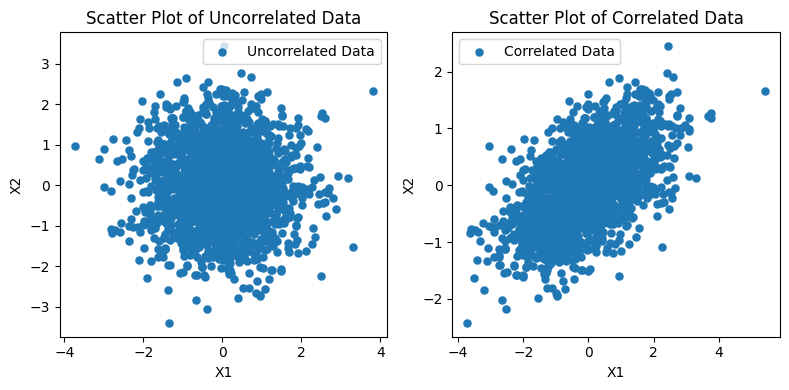

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define correlation matrix and Cholesky decomposition
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)

# Set seed for reproducibility
np.random.seed(0)

# Generate uncorrelated data (standard normal)
Z = np.random.standard_normal((2000, 2))

# Generate correlated data using Cholesky decomposition
X = Z @ A

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Uncorrelated data plot
axes[0].scatter(Z[:, 0], Z[:, 1], label='Uncorrelated Data', linewidths=0.1)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Scatter Plot of Uncorrelated Data')
axes[0].legend()

# Correlated data plot
axes[1].scatter(X[:, 0], X[:, 1], label='Correlated Data', linewidths=0.1)
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('Scatter Plot of Correlated Data')
axes[1].legend()

# Show the figure
plt.tight_layout()
plt.show()


<Figure size 400x400 with 0 Axes>

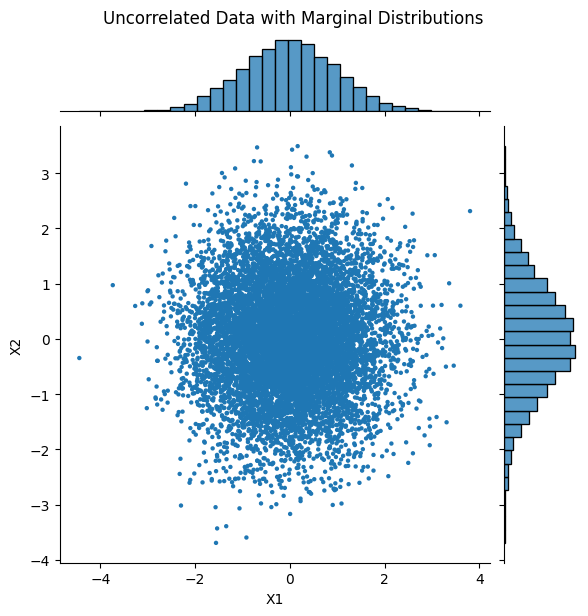

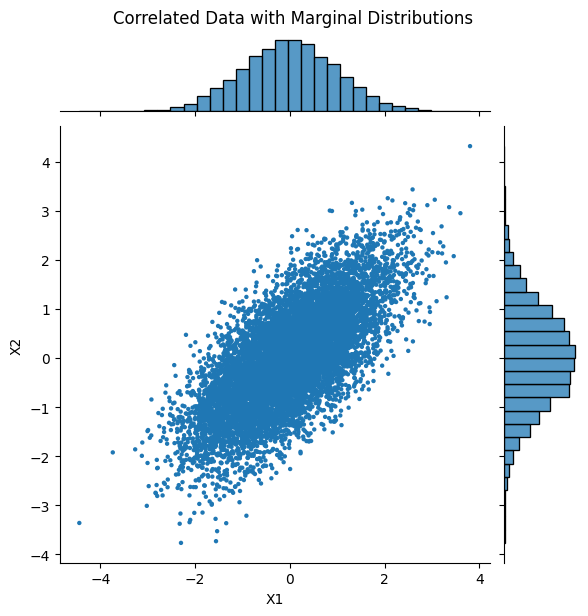

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define correlation matrix and Cholesky decomposition
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)

# Set seed for reproducibility
np.random.seed(0)

# Generate uncorrelated data (standard normal)
Z = np.random.standard_normal((10000, 2))

# Generate correlated data using Cholesky decomposition
X =  (A @ Z.T).T

# Convert to DataFrame for Seaborn
df_uncorrelated = pd.DataFrame(Z, columns=["X1", "X2"])
df_correlated = pd.DataFrame(X, columns=["X1", "X2"])

# Create scatter plots with marginal histograms
plt.figure(figsize=(4, 4))

# Uncorrelated Data
sns.jointplot(
    data=df_uncorrelated, x="X1", y="X2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Set point size and remove edge color
)
plt.suptitle("Uncorrelated Data with Marginal Distributions", y=1.02)

# Correlated Data
sns.jointplot(
    data=df_correlated, x="X1", y="X2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Set point size and remove edge color
)
plt.suptitle("Correlated Data with Marginal Distributions", y=1.02)

plt.show()


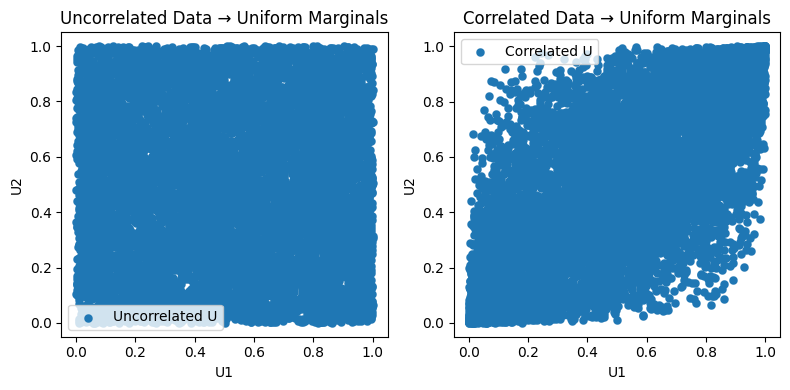

In [ ]:
# # Transform both datasets to uniform marginals using the standard normal CDF
U_uncorrelated = norm.cdf(Z)
U_correlated = norm.cdf(X)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Uncorrelated data transformed to uniform marginals
axes[0].scatter(U_uncorrelated[:, 0], U_uncorrelated[:, 1], label='Uncorrelated U', linewidths=0.1)
axes[0].set_xlabel('U1')
axes[0].set_ylabel('U2')
axes[0].set_title('Uncorrelated Data → Uniform Marginals')
axes[0].legend()

# Correlated data transformed to uniform marginals
axes[1].scatter(U_correlated[:, 0], U_correlated[:, 1], label='Correlated U', linewidths=0.1)
axes[1].set_xlabel('U1')
axes[1].set_ylabel('U2')
axes[1].set_title('Correlated Data → Uniform Marginals')
axes[1].legend()

# Show the figure
plt.tight_layout()
plt.show()

<Figure size 200x200 with 0 Axes>

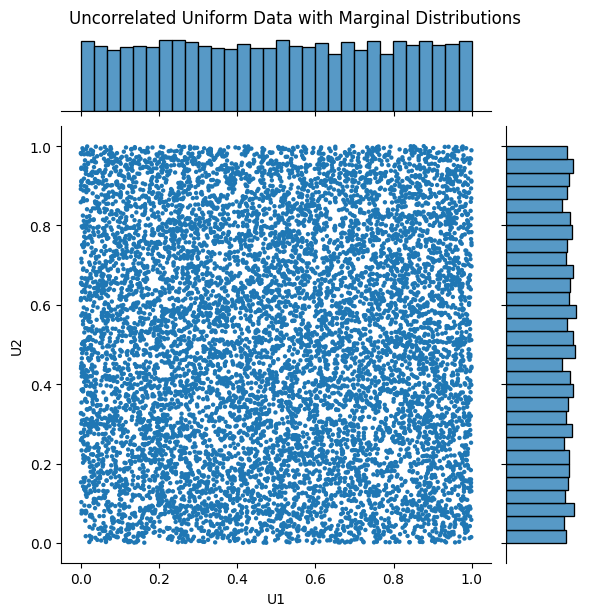

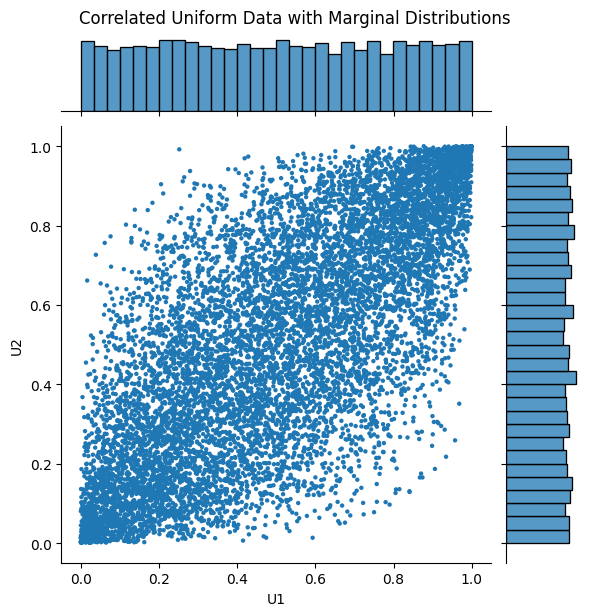

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm  # Import norm for CDF transformation

# Define correlation matrix and Cholesky decomposition
corrMat = np.array([[1, 0.76], [0.76, 1]])
A = np.linalg.cholesky(corrMat)

# Set seed for reproducibility
np.random.seed(42)

# Generate uncorrelated data (standard normal)
Z = np.random.standard_normal((10000, 2))

# Generate correlated data using Cholesky decomposition
X = (A @ Z.T).T

# Transform both datasets to uniform marginals using the standard normal CDF
U_uncorrelated = norm.cdf(Z)
U_correlated = norm.cdf(X)

# Convert to DataFrame for Seaborn
df_uncorrelated = pd.DataFrame(U_uncorrelated, columns=["U1", "U2"])
df_correlated = pd.DataFrame(U_correlated, columns=["U1", "U2"])

# Create scatter plots with marginal histograms
plt.figure(figsize=(2, 2))

# Uncorrelated Data
sns.jointplot(
    data=df_uncorrelated, x="U1", y="U2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Removes white outline
)
plt.suptitle("Uncorrelated Uniform Data with Marginal Distributions", y=1.02)

# Correlated Data
sns.jointplot(
    data=df_correlated, x="U1", y="U2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Removes white outline
)
plt.suptitle("Correlated Uniform Data with Marginal Distributions", y=1.02)

plt.show()


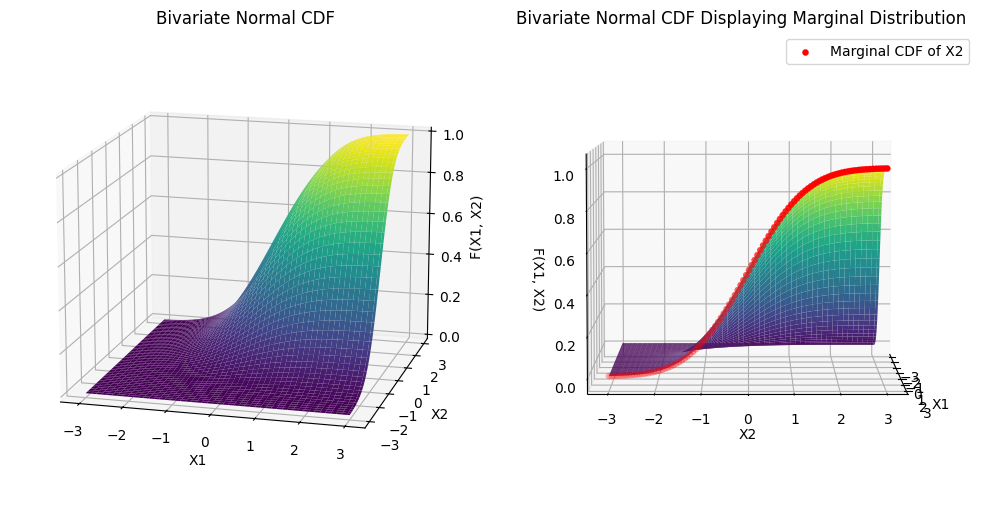

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Create a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Create the bivariate normal distribution for PDF
rv_pdf = multivariate_normal(mean, cov)
z_pdf = rv_pdf.pdf(pos)

# Create the bivariate normal distribution for CDF
rv_cdf = multivariate_normal(mean, cov)
z_cdf = rv_cdf.cdf(pos)

# Create the figure and subplots
fig = plt.figure(figsize=(20, 5))

# Plot the PDF surface
# ax1 = fig.add_subplot(141, projection='3d')
# ax1.plot_surface(x, y, z_pdf, cmap='viridis')
# ax1.set_title('Bivariate Normal PDF')
# ax1.set_xlabel('X1')
# ax1.set_ylabel('X2')
# ax1.set_zlabel('f(X1, X2)')
# ax1.view_init(elev=15, azim=70, roll=0)

# Plot the CDF surface
ax2 = fig.add_subplot(142, projection='3d')
ax2.plot_surface(x, y, z_cdf, cmap='viridis')
ax2.set_title('Bivariate Normal CDF')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('F(X1, X2)')
ax2.view_init(elev=15, azim=285, roll=0)


# Plot of the copula function
# create a grid of (u_x, u_y) points ie the unit square
u_x = norm.cdf(x)
u_y = norm.cdf(y)

ax3 = fig.add_subplot(143, projection='3d')
ax3.plot_surface(x, y, z_cdf, cmap='viridis')
ax3.scatter(x[:,-1], y[:,-1], z_cdf[:,-1], color='red', linewidth=0.2 ,label='Marginal CDF of X2')
ax3.set_title('Bivariate Normal CDF Displaying Marginal Distribution')
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.legend()
ax3.set_zlabel('F(X1, X2)')
ax3.view_init(elev=5, azim=0, roll=0)

# Copula PDF function
# c_pdf = z_pdf / (norm.pdf(x) * norm.pdf(y))

# ax4 = fig.add_subplot(144, projection='3d')
# ax4.plot_surface(u_x, u_y, c_pdf, cmap= 'viridis')
# ax4.set_title('Copula PDF')
# ax4.set_xlabel('F(X1) = u1')
# ax4.set_ylabel('F(X2) = u2')
# ax4.set_zlabel('c(u1, u2)')
# ax4.view_init(elev=15, azim=60, roll=0)

plt.tight_layout()
plt.show()

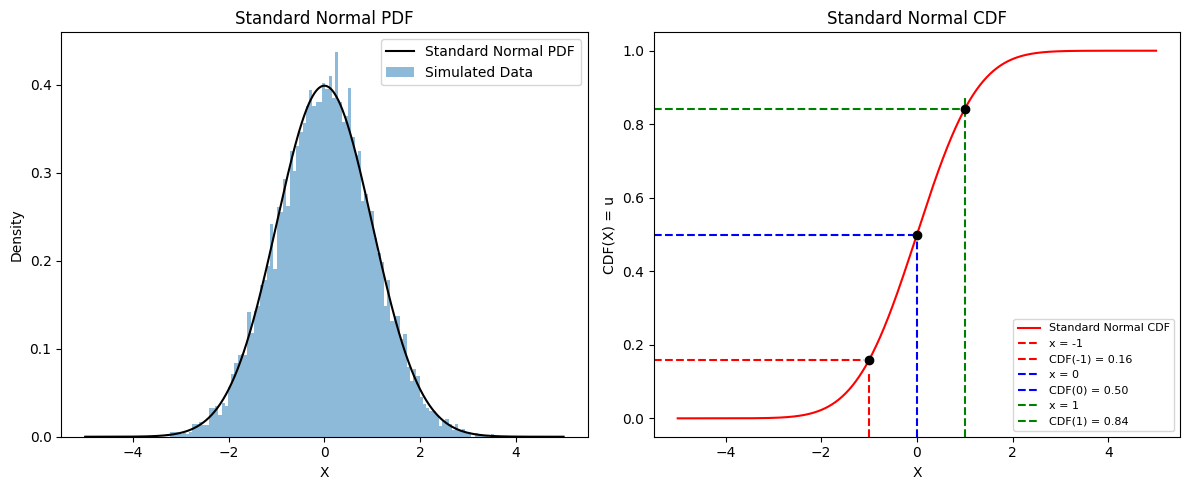

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
Z = np.random.standard_normal(10000)

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x)
cdf = norm.cdf(x)

# Chosen x values
x_values = [-1, 0, 1]  # Modify these as needed
y_values = norm.cdf(x_values)  # Get corresponding CDF values

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
axes[0].plot(x, pdf, label='Standard Normal PDF',color='black')
axes[0].hist(Z, bins=100, density=True, alpha=0.5, label='Simulated Data')
axes[0].set_title('Standard Normal PDF')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot CDF
axes[1].plot(x, cdf, label='Standard Normal CDF',color = 'red')
axes[1].set_title('Standard Normal CDF')
axes[1].set_xlabel('X')
axes[1].set_ylabel('CDF(X) = u')
axes[1].legend()

# Colors for the lines
colors = ['red', 'blue', 'green']

# Add vertical and horizontal lines for each x_value
for i, x_value in enumerate(x_values):
    y_value = y_values[i]
    color = colors[i]
    axes[1].axvline(x_value, ymin=0, ymax=y_value, linestyle='dashed', color=color, label=f'x = {x_value}')
    axes[1].axhline(y_value, xmin=0, xmax=(x_value + 5) / 10, linestyle='dashed', color=color, label=f'CDF({x_value}) = {y_value:.2f}')
    axes[1].scatter(x_value, y_value, color='black', zorder=3)

axes[1].legend(fontsize=8)
plt.tight_layout()
plt.show()


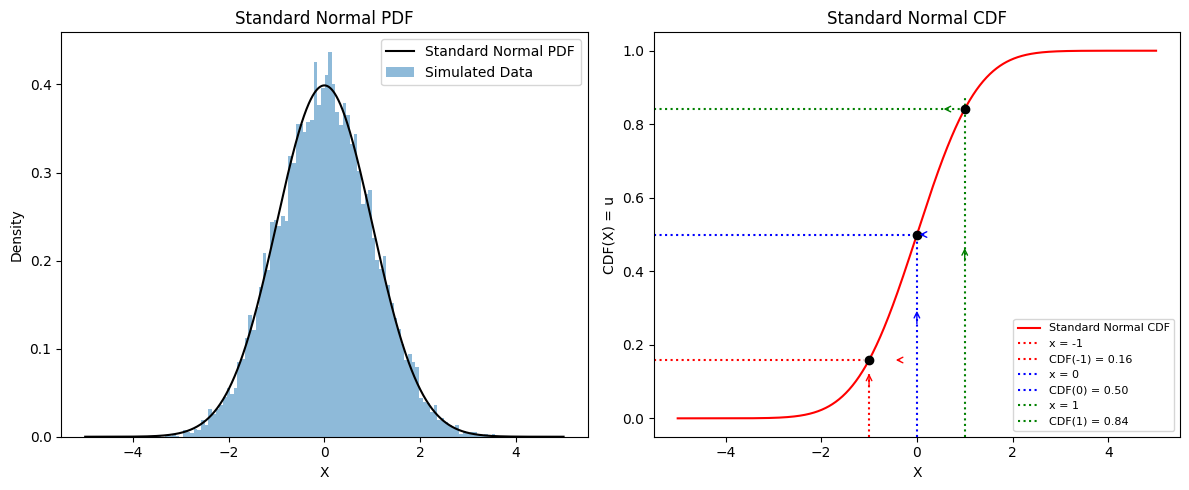

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
Z = np.random.standard_normal(10000)

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x)
cdf = norm.cdf(x)

# Chosen x values
x_values = [-1, 0, 1]  # Modify these as needed
y_values = norm.cdf(x_values)  # Get corresponding CDF values

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
axes[0].plot(x, pdf, label='Standard Normal PDF', color='black')
axes[0].hist(Z, bins=100, density=True, alpha=0.5, label='Simulated Data')
axes[0].set_title('Standard Normal PDF')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot CDF
axes[1].plot(x, cdf, label='Standard Normal CDF', color='red')
axes[1].set_title('Standard Normal CDF')
axes[1].set_xlabel('X')
axes[1].set_ylabel('CDF(X) = u')
axes[1].legend()

# Colors for the lines
colors = ['red', 'blue', 'green']

# Add vertical and horizontal lines with arrows
for i, x_value in enumerate(x_values):
    y_value = y_values[i]
    color = colors[i]
    
    # Vertical line
    axes[1].axvline(x_value, ymin=0, ymax=y_value, linestyle='dotted', color=color, label=f'x = {x_value}')
    # Horizontal line
    axes[1].axhline(y_value, xmin=0, xmax=(x_value + 5) / 10, linestyle='dotted', color=color, label=f'CDF({x_value}) = {y_value:.2f}')
    # Point at intersection
    axes[1].scatter(x_value, y_value, color='black', zorder=3)

    # Reverse the direction of the arrow on the vertical line
    axes[1].annotate("", xy=(x_value, y_value / 2), xytext=(x_value, y_value / 2 + 0.05),  # Adjust arrow direction
                     arrowprops=dict(arrowstyle="<-", color=color))

    # Reverse the direction of the arrow on the horizontal line
    axes[1].annotate("", xy=(x_value / 2, y_value), xytext=(x_value / 2 + 0.2, y_value),  # Adjust arrow direction
                     arrowprops=dict(arrowstyle="->", color=color))

axes[1].legend(fontsize=8)
plt.tight_layout()
plt.show()


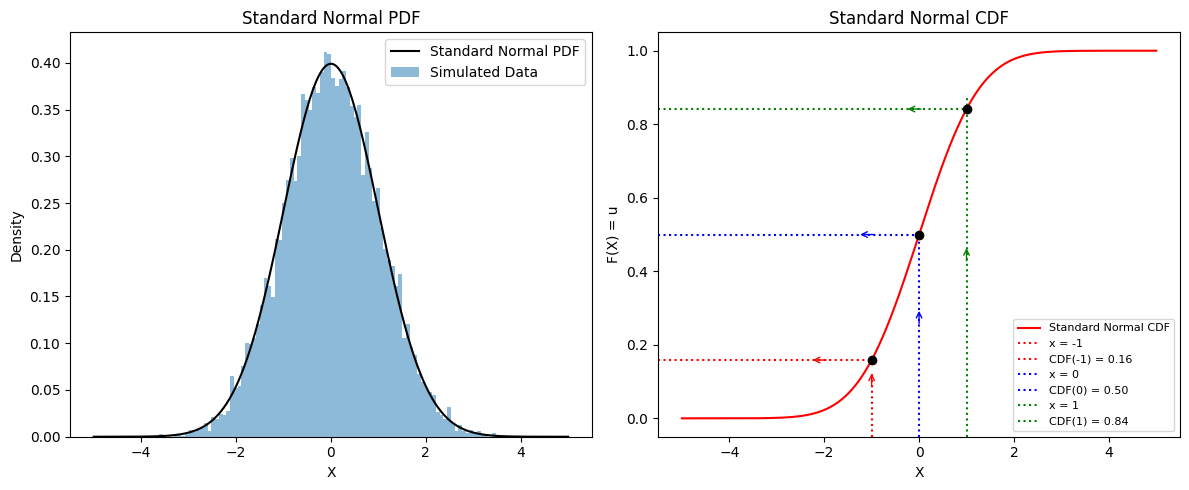

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
Z = np.random.standard_normal(10000)

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x)
cdf = norm.cdf(x)

# Chosen x values
x_values = [-1, 0, 1]  # Modify these as needed
y_values = norm.cdf(x_values)  # Get corresponding CDF values

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
axes[0].plot(x, pdf, label='Standard Normal PDF', color='black')
axes[0].hist(Z, bins=100, density=True, alpha=0.5, label='Simulated Data')
axes[0].set_title('Standard Normal PDF')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot CDF
axes[1].plot(x, cdf, label='Standard Normal CDF', color='red')
axes[1].set_title('Standard Normal CDF')
axes[1].set_xlabel('X')
axes[1].set_ylabel('F(X) = u')
axes[1].legend()

# Colors for the lines
colors = ['red', 'blue', 'green']

# Add vertical and horizontal lines with arrows
for i, x_value in enumerate(x_values):
    y_value = y_values[i]
    color = colors[i]
    
    # Vertical line
    axes[1].axvline(x_value, ymin=0, ymax=y_value, linestyle='dotted', color=color, label=f'x = {x_value}')
    # Horizontal line
    axes[1].axhline(y_value, xmin=0, xmax=(x_value + 5) / 10, linestyle='dotted', color=color, label=f'CDF({x_value}) = {y_value:.2f}')
    # Point at intersection
    axes[1].scatter(x_value, y_value, color='black', zorder=3)

    # Reverse the direction of the arrow on the vertical line
    axes[1].annotate("", xy=(x_value, y_value / 2), xytext=(x_value, y_value / 2 + 0.05),  # Adjust arrow direction
                     arrowprops=dict(arrowstyle="<-", color=color))

    # Adjusted: Reverse the direction of the arrow on the horizontal line (move it left)
    axes[1].annotate("", xy=(x_value - 1.3, y_value), xytext=(x_value - 0.9, y_value),  # Move the arrow more to the left
                     arrowprops=dict(arrowstyle="->", color=color))

axes[1].legend(fontsize=8)
plt.tight_layout()
plt.show()


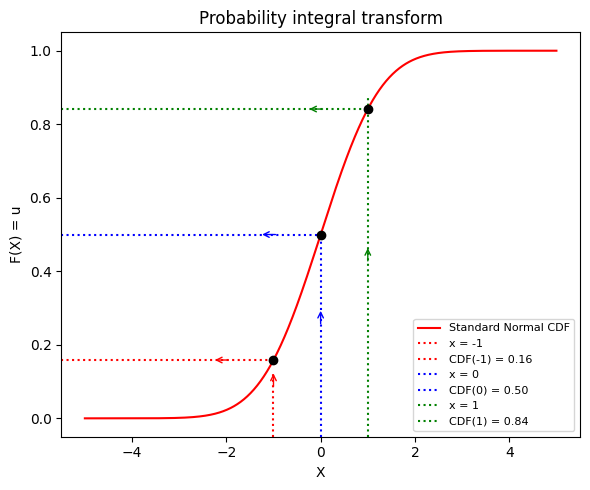

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
Z = np.random.standard_normal(10000)

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x)
cdf = norm.cdf(x)

# Chosen x values
x_values = [-1, 0, 1]  # Modify these as needed
y_values = norm.cdf(x_values)  # Get corresponding CDF values

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 5))

# Plot CDF
ax.plot(x, cdf, label='Standard Normal CDF', color='red')
ax.set_title('Probability integral transform')
ax.set_xlabel('X')
ax.set_ylabel('F(X) = u')
ax.legend()

# Colors for the lines
colors = ['red', 'blue', 'green']

# Add vertical and horizontal lines with arrows
for i, x_value in enumerate(x_values):
    y_value = y_values[i]
    color = colors[i]
    
    # Vertical line
    ax.axvline(x_value, ymin=0, ymax=y_value, linestyle='dotted', color=color, label=f'x = {x_value}')
    # Horizontal line
    ax.axhline(y_value, xmin=0, xmax=(x_value + 5) / 10, linestyle='dotted', color=color, label=f'CDF({x_value}) = {y_value:.2f}')
    # Point at intersection
    ax.scatter(x_value, y_value, color='black', zorder=3)

    # Reverse the direction of the arrow on the vertical line
    ax.annotate("", xy=(x_value, y_value / 2), xytext=(x_value, y_value / 2 + 0.05),  # Adjust arrow direction
                 arrowprops=dict(arrowstyle="<-", color=color))

    # Adjusted: Reverse the direction of the arrow on the horizontal line (move it left)
    ax.annotate("", xy=(x_value - 1.3, y_value), xytext=(x_value - 0.9, y_value),  # Move the arrow more to the left
                 arrowprops=dict(arrowstyle="->", color=color))

ax.legend(fontsize=8)
plt.tight_layout()
plt.show()


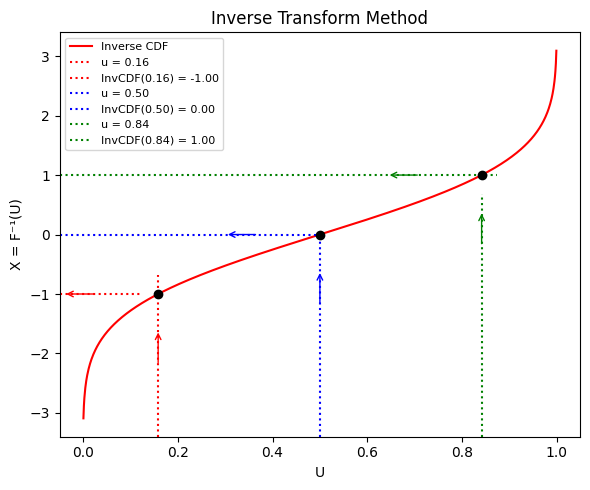

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Uniform values (u)
u = np.linspace(0.001, 0.999, 1000)
inv_cdf = norm.ppf(u)  # Inverse CDF

# Chosen u values
u_values = [0.1587, 0.5, 0.8413]
x_values = norm.ppf(u_values)

# Plot setup
fig, ax = plt.subplots(figsize=(6, 5))

# Plot inverse CDF curve
ax.plot(u, inv_cdf, label='Inverse CDF', color='red')
ax.set_title('Inverse Transform Method')
ax.set_xlabel('U')
ax.set_ylabel('X = F⁻¹(U)')
ax.legend()

colors = ['red', 'blue', 'green']

for i, u_val in enumerate(u_values):
    x_val = x_values[i]
    color = colors[i]

    # Vertical dotted line
    ax.axvline(u_val, ymin=0, ymax=(x_val + 5) / 10, linestyle='dotted', color=color, label=f'u = {u_val:.2f}')
    # Horizontal dotted line
    ax.axhline(x_val, xmin=0, xmax=u_val, linestyle='dotted', color=color, label=f'InvCDF({u_val:.2f}) = {x_val:.2f}')
    # Mark intersection
    ax.scatter(u_val, x_val, color='black', zorder=3)

    # Downward arrow on the vertical line
    ax.annotate("", xy=(u_val, x_val - 1.2), xytext=(u_val, x_val -0.6),
                arrowprops=dict(arrowstyle="<-", color=color))

    # Leftward arrow on the horizontal line
    ax.annotate("", xy=(u_val - 0.2, x_val), xytext=(u_val - 0.13, x_val),
                arrowprops=dict(arrowstyle="->", color=color))

ax.legend(fontsize=8)
plt.tight_layout()
plt.show()


In [80]:
np.log(1/2)
#np.log(2)

np.float64(-0.6931471805599453)

## Log vs simple returns

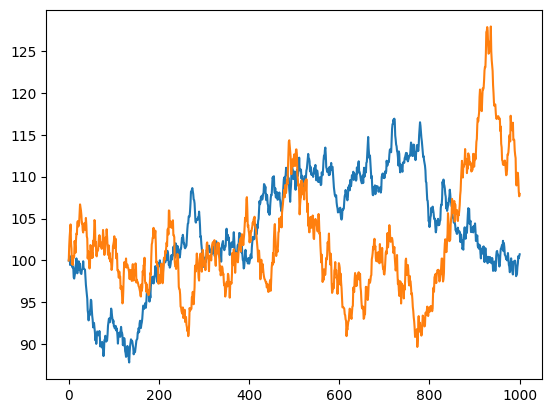

In [64]:
s_0 = np.array([100, 100]); mu = np.array([0.03, 0.03]); sigma = np.array([0.2, 0.3])
Timesteps = 1000; T = 1; dt = T/Timesteps   
stocks = s_0.shape[0]


def eulerMaruyama(s_0, Z, mu, sigma, dt):
    stocks = s_0.shape[0]
    timeSteps = Z.shape[0]
    S = s_0 * np.ones((timeSteps+1, stocks))
    
    for t in range(1, timeSteps+1):

        S[t, :] =  (S[t-1, :] + S[t-1, :]* mu * dt + S[t-1, :]*sigma * np.sqrt(dt) * Z[t-1, :])
    return S

Z = np.random.standard_normal((Timesteps, stocks))
S = eulerMaruyama(s_0, Z, mu, sigma, dt)
plt.plot(S) 

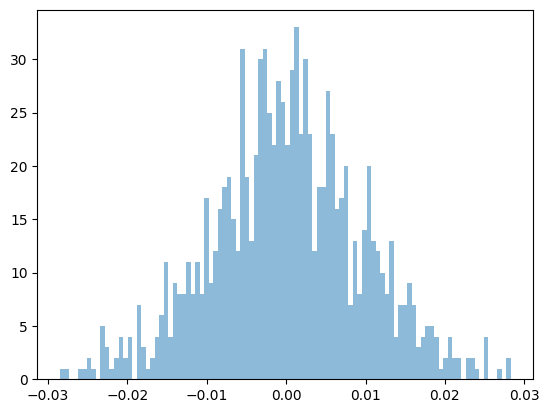

In [69]:

def logReturns(S):
    logReturns = np.log(S[1:,:] / S[:-1,:])
    return logReturns


def simpleReturns(S):
    simpleReturns = ((S[1:,:] - S[:-1,:])/ S[:-1,:])
    return simpleReturns



# Assuming S is already defined and contains the simulated stock prices
logR = logReturns(S)
simR = simpleReturns(S)


#plt.hist(logR[:,0], bins=100, alpha=0.5, label='Log Returns 1');
plt.hist(simR[:,1], bins=100, alpha=0.5, label='Simple Returns 1');



In [71]:
#!pip install yfinance


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 58.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=639081fa332f2b721adc640ffee2a768f38b1dc14ff2fdb5845c73591370db04
  Stored in directory: c:\users\johanherbert\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\f4\14\e4\50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee


[*********************100%***********************]  1 of 1 completed


C:\Users\JohanHerbert\AppData\Local\Temp\ipykernel_19292\3238127151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['logReturns'] = np.log(data['Close']).diff()
C:\Users\JohanHerbert\AppData\Local\Temp\ipykernel_19292\3238127151.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentReturns'] = data['Close'].pct_change()


array([[<Axes: title={'center': "('Close', 'TSLA')"}>,
        <Axes: title={'center': "('logReturns', '')"}>],
       [<Axes: title={'center': "('percentReturns', '')"}>, <Axes: >]],
      dtype=object)

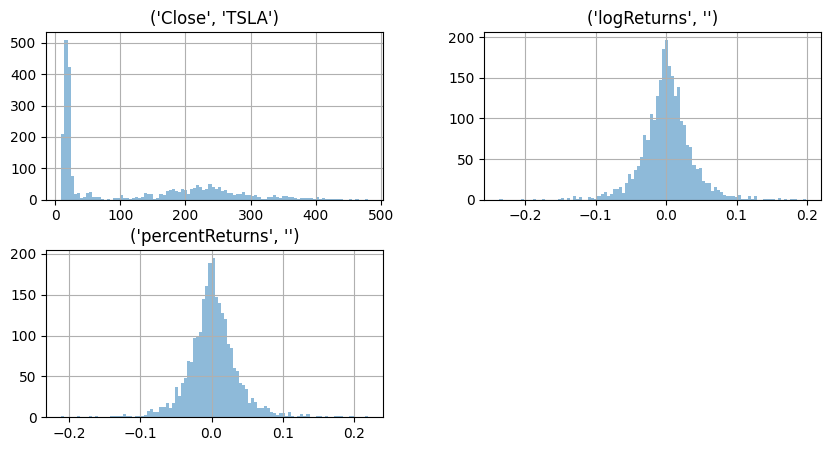

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock ticker
symbol = "TSLA"

# Define the date range (last 10 years)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=365*10)).strftime('%Y-%m-%d')

# Download historical stock data
tsla_data = yf.download(symbol, start=start_date, end=end_date)
data = tsla_data[['Close']]

data['logReturns'] = np.log(data['Close']).diff()
#data['simpleReturns'] = (data['Close']).diff() - 1

data['percentReturns'] = data['Close'].pct_change()



data.hist(bins=100, alpha=0.5, figsize=(10, 5))

# Polynomial interpolation using Chebyshev interpolation

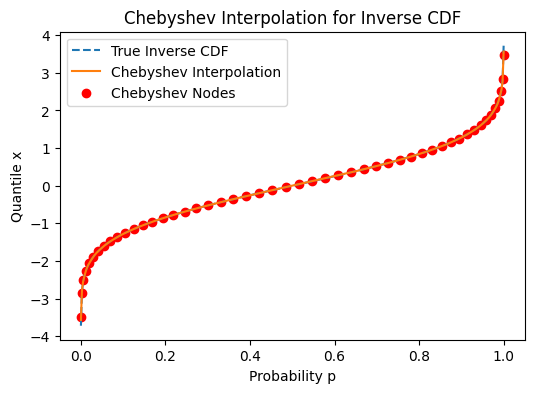

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import BarycentricInterpolator
import scipy

def chebyshev_nodes(n, a, b):
    """Generate n Chebyshev nodes in the interval [a, b]."""
    return np.array([0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k + 1) * np.pi / (2 * n)) for k in range(n)])

def approximate_inverse_cdf(cdf, n, a=0, b=1):
    """
    Approximate the inverse CDF of a given CDF function using Chebyshev interpolation.
    
    Parameters:
    - cdf: The cumulative distribution function (must be invertible)
    - n: Number of Chebyshev nodes
    - a, b: The probability range for inversion (default [0,1])
    
    Returns:
    - Interpolant function for inverse CDF
    """
    # Generate Chebyshev nodes in the probability domain [0,1]
    p_nodes = chebyshev_nodes(n, a, b)
    
    # Compute the corresponding x-values (inverse CDF)
    x_values = np.array([scipy.optimize.fsolve(lambda x: cdf(x) - p, norm.ppf(p))[0] for p in p_nodes])

    # Create interpolant
    interpolant = BarycentricInterpolator(p_nodes, x_values)
    
    return interpolant


# Define a known CDF (Normal distribution)
cdf = norm.cdf  # Standard normal CDF
n = 50  # Number of interpolation points

# Approximate inverse CDF using Chebyshev interpolation
inverse_cdf_interp = approximate_inverse_cdf(cdf, n)

# Compare with true inverse CDF (ppf function of normal distribution)
p_dense = np.linspace(0.0001, 0.9999, 400)
x_true = norm.ppf(p_dense)
x_interp = inverse_cdf_interp(p_dense)

# Plot results
plt.plot(p_dense, x_true, label='True Inverse CDF', linestyle='dashed')
plt.plot(p_dense, x_interp, label='Chebyshev Interpolation')
plt.scatter(chebyshev_nodes(n, 0, 1), inverse_cdf_interp(chebyshev_nodes(n, 0, 1)), color='red', label='Chebyshev Nodes')
plt.legend()
plt.title("Chebyshev Interpolation for Inverse CDF")
plt.xlabel("Probability p")
plt.ylabel("Quantile x")
plt.show()


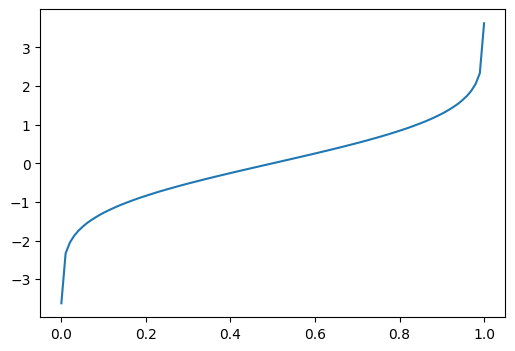

In [56]:
u = np.linspace(0, 1, 100)
y = inverse_cdf_interp(u)
plt.plot(u,y)

# Investigating copula for $X$ with $X^2$

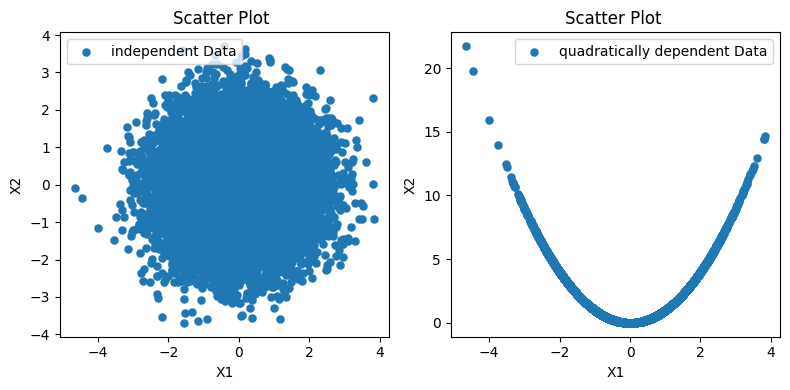

In [36]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
Z = np.random.standard_normal((20000, 2))
X = np.zeros((20000, 2))
X[:,0]=Z[:,0] 
X[:,1]=Z[:,0] ** 2

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Uncorrelated data plot
axes[0].scatter(Z[:, 0], Z[:, 1], label='independent Data', linewidths=0.1)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Scatter Plot ')
axes[0].legend()

# Correlated data plot
axes[1].scatter(X[:, 0], X[:, 1], label='quadratically dependent Data', linewidths=0.1)
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('Scatter Plot ')
axes[1].legend()

plt.tight_layout()
plt.show()


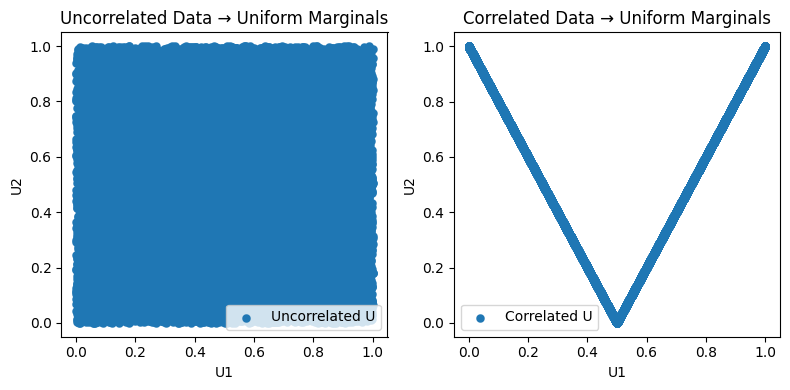

In [39]:
# # Transform both datasets to uniform marginals using the standard normal CDF
U_uncorrelated = norm.cdf(Z)
U_correlated = np.zeros(X.shape)
U_correlated[:,0] = norm.cdf(X[:,0])
U_correlated[:,1] = chi2.cdf(X[:,1], df=1) #norm.cdf(X)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Uncorrelated data transformed to uniform marginals
axes[0].scatter(U_uncorrelated[:, 0], U_uncorrelated[:, 1], label='Uncorrelated U', linewidths=0.1)
axes[0].set_xlabel('U1')
axes[0].set_ylabel('U2')
axes[0].set_title('Uncorrelated Data → Uniform Marginals')
axes[0].legend()

# Correlated data transformed to uniform marginals
axes[1].scatter(U_correlated[:, 0], U_correlated[:, 1], label='Correlated U', linewidths=0.1)
axes[1].set_xlabel('U1')
axes[1].set_ylabel('U2')
axes[1].set_title('Correlated Data → Uniform Marginals')
axes[1].legend()

# Show the figure
plt.tight_layout()
plt.show()

In [32]:
# # Convert to DataFrame for Seaborn
# import seaborn as sns
# df_uncorrelated = pd.DataFrame(Z, columns=["X1", "X2"])
# df_correlated = pd.DataFrame(X, columns=["X1", "X2"])

# # Create scatter plots with marginal histograms
# plt.figure(figsize=(4, 4))

# # Uncorrelated Data
# sns.jointplot(
#     data=df_uncorrelated, x="X1", y="X2", kind="scatter",
#     marginal_kws=dict(bins=30, fill=True),
#     joint_kws={"s": 10, "edgecolor": "none"}  # Set point size and remove edge color
# )
# plt.suptitle("Uncorrelated Data with Marginal Distributions", y=1.02)

# # Correlated Data
# sns.jointplot(
#     data=df_correlated, x="X1", y="X2", kind="scatter",
#     marginal_kws=dict(bins=30, fill=True),
#     joint_kws={"s": 10, "edgecolor": "none"}  # Set point size and remove edge color
# )
# plt.suptitle("Correlated Data with Marginal Distributions", y=1.02)

# plt.show()

<Figure size 200x200 with 0 Axes>

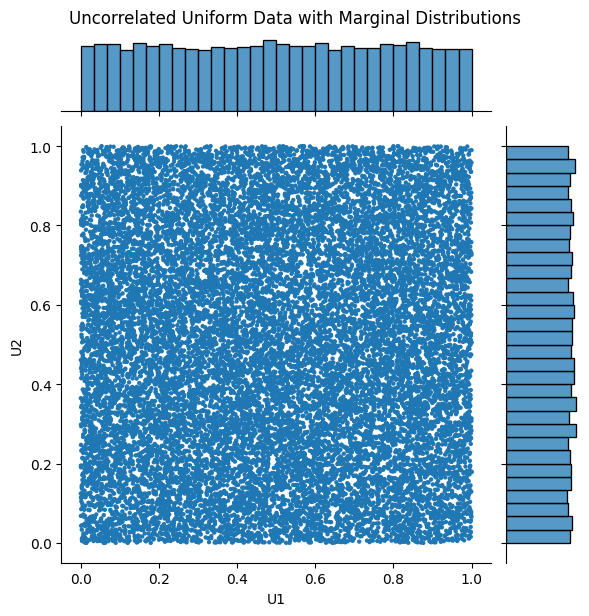

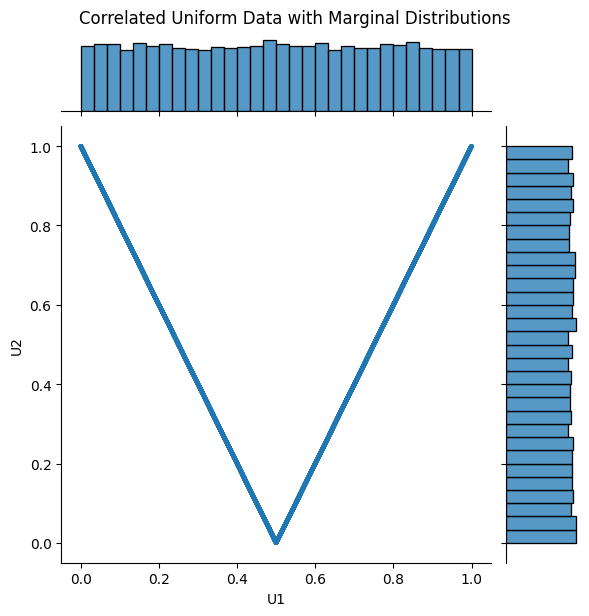

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm  # Import norm for CDF transformation

# Convert to DataFrame for Seaborn
df_uncorrelated = pd.DataFrame(U_uncorrelated, columns=["U1", "U2"])
df_correlated = pd.DataFrame(U_correlated, columns=["U1", "U2"])

# Create scatter plots with marginal histograms
plt.figure(figsize=(2, 2))

# Uncorrelated Data
sns.jointplot(
    data=df_uncorrelated, x="U1", y="U2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Removes white outline
)
plt.suptitle("Uncorrelated Uniform Data with Marginal Distributions", y=1.02)

# Correlated Data
sns.jointplot(
    data=df_correlated, x="U1", y="U2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Removes white outline
)
plt.suptitle("Correlated Uniform Data with Marginal Distributions", y=1.02)

plt.show()


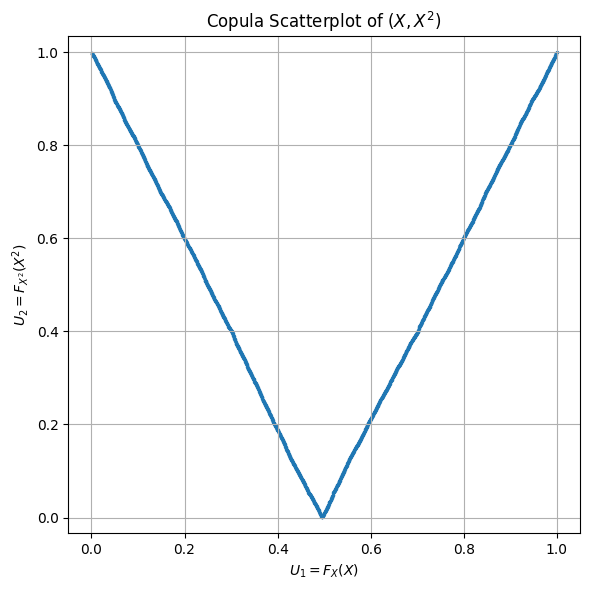

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rankdata

# Step 1: Simulate data
np.random.seed(42)
n = 5000
X = np.random.normal(0, 1, size=n)
Y = X**2

# Step 2: Empirical CDF to get copula uniforms
def to_uniform(data):
    ranks = rankdata(data, method='ordinal')  # rank transform
    return ranks / (len(data) + 1)  # avoid 0 or 1 exactly

U1 = to_uniform(X)
U2 = to_uniform(Y)

# Step 3: Scatterplot of the copula
plt.figure(figsize=(6, 6))
plt.scatter(U1, U2, s=2, alpha=0.5)
plt.title('Copula Scatterplot of $(X, X^2)$')
plt.xlabel('$U_1 = F_X(X)$')
plt.ylabel('$U_2 = F_{X^2}(X^2)$')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

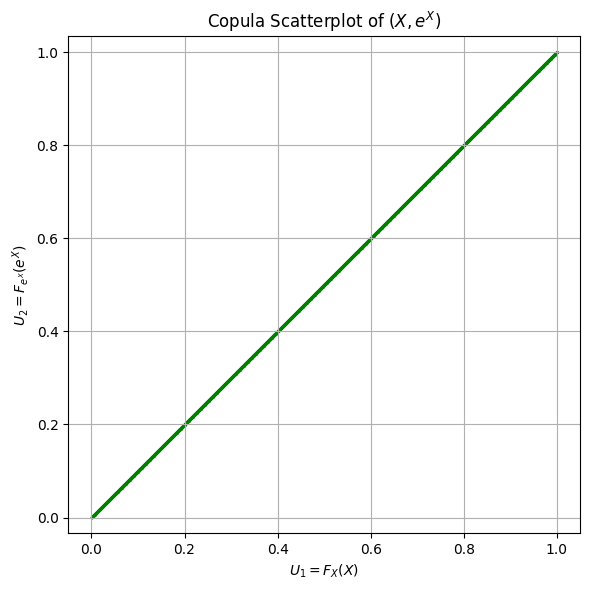

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# Step 1: Simulate data
np.random.seed(42)
n = 5000
X = np.random.normal(0, 1, size=n)
Y = np.exp(X)

# Step 2: Empirical CDFs to transform to copula variables
def to_uniform(data):
    ranks = rankdata(data, method='ordinal')
    return ranks / (len(data) + 1)

U1 = to_uniform(X)
U2 = to_uniform(Y)

# Step 3: Copula scatterplot
plt.figure(figsize=(6, 6))
plt.scatter(U1, U2, s=2, alpha=0.5, color='green')
plt.title('Copula Scatterplot of $(X, e^X)$')
plt.xlabel('$U_1 = F_X(X)$')
plt.ylabel('$U_2 = F_{e^X}(e^X)$')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


<Figure size 200x200 with 0 Axes>

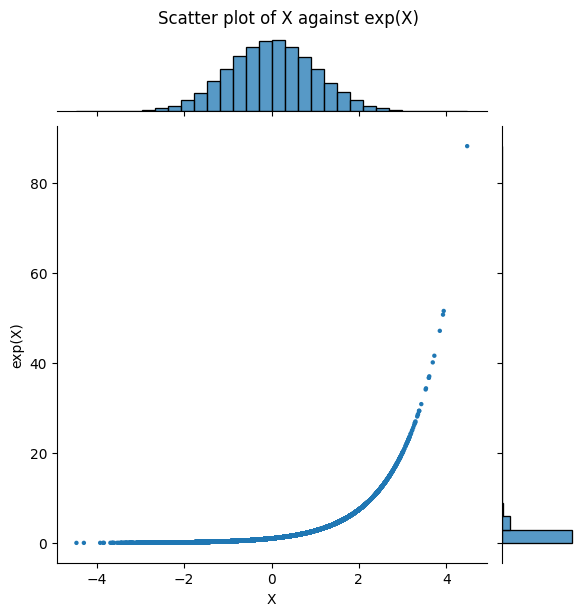

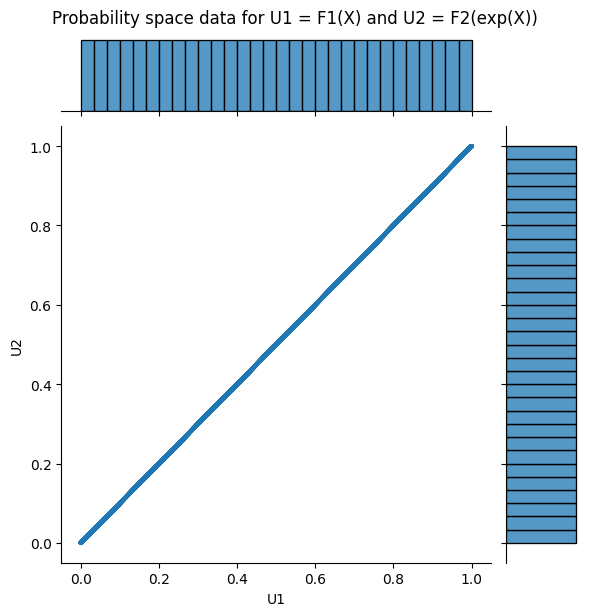

In [32]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm  # Import norm for CDF transformation

# Convert to DataFrame for Seaborn
df_uncorrelated = pd.DataFrame(np.column_stack((X,Y)) , columns=["X", "exp(X)"])
df_correlated = pd.DataFrame(np.column_stack((U1,U2)) , columns=["U1", "U2"])


# Create scatter plots with marginal histograms
plt.figure(figsize=(2, 2))

# Uncorrelated Data
sns.jointplot(
    data=df_uncorrelated, x="X", y="exp(X)", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Removes white outline
)
plt.suptitle("Scatter plot of X against exp(X) ", y=1.02)

# Correlated Data
sns.jointplot(
    data=df_correlated, x="U1", y="U2", kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"s": 10, "edgecolor": "none"}  # Removes white outline
)
plt.suptitle("Probability space data for U1 = F1(X) and U2 = F2(exp(X))", y=1.02)

plt.show()

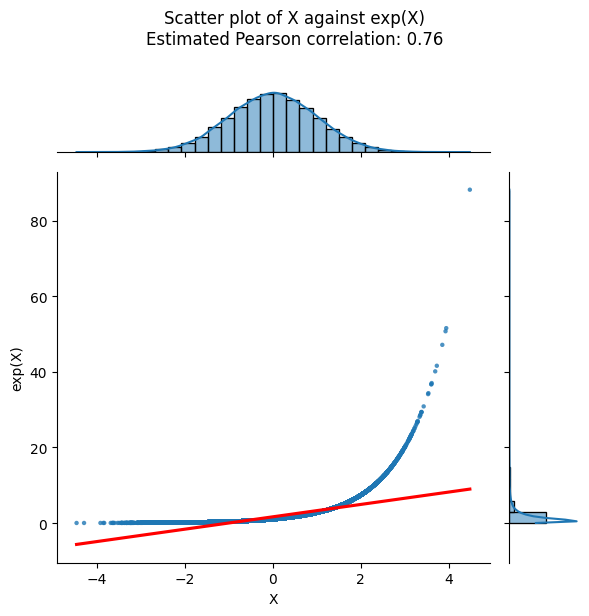

Pearson correlation between X and exp(X): 0.76


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata, pearsonr

# Simulate data
np.random.seed(42)
n = 50000
X = np.random.normal(0, 1, size=n)
Y = np.exp(X)

# Copula transformation
def to_uniform(data):
    ranks = rankdata(data, method='ordinal')
    return ranks / (len(data) + 1)

U1 = to_uniform(X)
U2 = to_uniform(Y)

# Prepare DataFrames
df_uncorrelated = pd.DataFrame(np.column_stack((X, Y)), columns=["X", "exp(X)"])
df_correlated = pd.DataFrame(np.column_stack((U1, U2)), columns=["U1", "U2"])

# Calculate Pearson correlation
corr = np.corrcoef(X, Y)[0, 1]

# Plot with regression line and histograms
g = sns.jointplot(
    data=df_uncorrelated, x="X", y="exp(X)", kind="reg",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"scatter_kws": {"s": 10, "edgecolor": "none"}, "line_kws": {"color": "red"}}
)

# Annotate with correlation value
plt.suptitle(f"Scatter plot of X against exp(X)\nEstimated Pearson correlation: {corr:.2f}", y=1.02)
plt.tight_layout()
plt.show()

print(f"Pearson correlation between X and exp(X): {corr:.2f}")

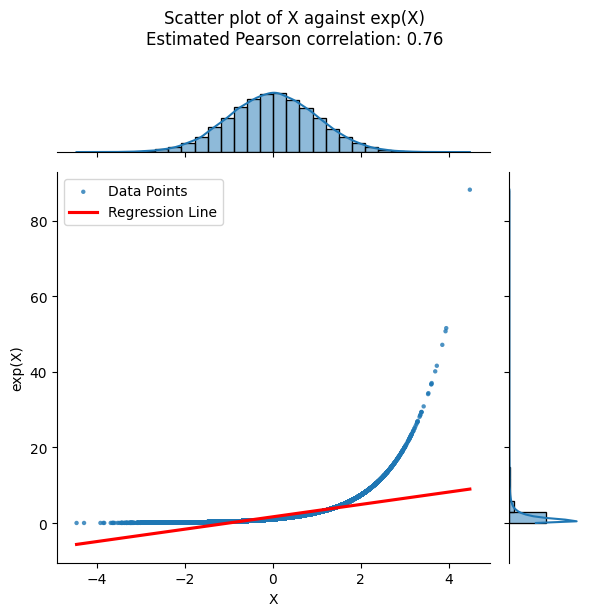

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata, pearsonr

# Simulate data
np.random.seed(42)
n = 50000
X = np.random.normal(0, 1, size=n)
Y = np.exp(X)

# Copula transformation
def to_uniform(data):
    ranks = rankdata(data, method='ordinal')
    return ranks / (len(data) + 1)

U1 = to_uniform(X)
U2 = to_uniform(Y)

# Prepare DataFrames
df_uncorrelated = pd.DataFrame(np.column_stack((X, Y)), columns=["X", "exp(X)"])
df_correlated = pd.DataFrame(np.column_stack((U1, U2)), columns=["U1", "U2"])

# Calculate Pearson correlation
corr = np.corrcoef(X, Y)[0, 1]

# Plot with regression line and histograms
g = sns.jointplot(
    data=df_uncorrelated, x="X", y="exp(X)", kind="reg",
    marginal_kws=dict(bins=30, fill=True),
    joint_kws={"scatter_kws": {"s": 10, "edgecolor": "none"}, "line_kws": {"color": "red"}}
)

# Add legend for the scatter plot and regression line
plt.suptitle(f"Scatter plot of X against exp(X)\nEstimated Pearson correlation: {corr:.2f}", y=1.02)
plt.legend([ "Data Points","Regression Line"], loc='upper left')
plt.tight_layout()
plt.show()


Text(0, 0.5, '$Y = e^X$')

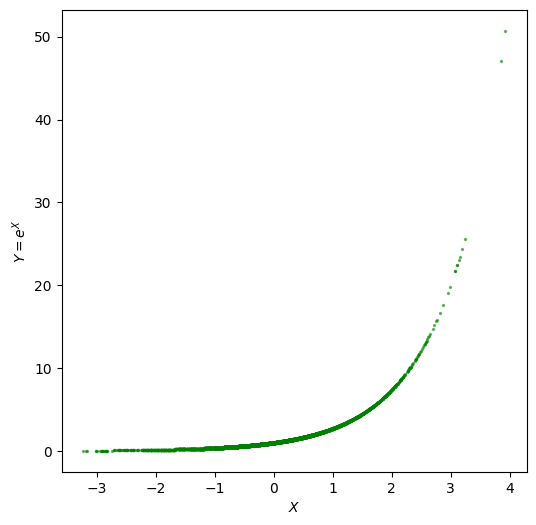

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, s=2, alpha=0.5, color='green')
plt.xlabel('$X$')
plt.ylabel('$Y = e^X$')




# Gaussian Copula Test Build

In [ ]:
#!pip install statsmodels


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import importlib
import numpy as np
#from statsmodels.sandbox.distributions.mvstdt import mvstdtprob
from scipy.stats import multivariate_t
from scipy.stats import norm
import sympy as sp 
from scipy.optimize import minimize
from functools import partial
from scipy.stats import norm, t
from statsmodels.graphics.gofplots import qqplot
from statsmodels import distributions
import statsmodels.api as sm


In [ ]:
class GaussianCopula():
    def __init__(self):
        self.corr = None
        self.data = None
        self.transformedData = None
        self.IsFitted = False
        pass

    def fitModel(self, data, correlationMeasure='pearson'):
        # Function to fit copula model     
        correlation = np.corrcoef(data, method=correlationMeasure)
        self.corr = [[1, correlation], [correlation, 1]]
        self.data = data
        self.transformedData = norm.cdf(data)   
        self.IsFitted = True
        pass

    def evalCDF(self, u1,u2):
        # Function to evaluate CDF of copula
        if self.IsFitted == False:
            raise ValueError('Model not fitted')
        else:
            mean = [0, 0]
            cov = [[1, self.correlation], [self.correlation, 1]]
            marginal1 = norm.ppf(u1)
            marginal2 = norm.ppf(u2)
            CopulaFunction = multivariate_normal(mean, cov).cdf([marginal1, marginal2])
            return CopulaFunction
            
    def evalPDF(self, u1,u2):
        # Create the bivariate normal distribution pdf
        if self.IsFitted == False:
            raise ValueError('Model not fitted')
        else:
            mean = [0, 0]
            marginal1 = norm.ppf(u1)
            marginal2 = norm.ppf(u2)
            dist = multivariate_normal(mean=mean, cov=self.corr)
            pdf_value = dist.pdf([marginal1, marginal2])
            return pdf_value

    def sampleCopula(self, n, correlation = 0.0):
        # Function to sample data from copula
        if self.IsFitted == True:
            corr = self.corr
        else:
            # Availability to generate data with different correlation
            corr = [[1, correlation], [correlation, 1]]

        A = np.linalg.cholesky(corr)
        Z = np.random.standard_normal((n, 2))
        X = (A @ Z.T).T
        U = norm.cdf(X)
        return U


class StudentsCopula():
    def __init__(self):
        self.corr = None
        self.degreeFreedom = None
        self.data = None
        self.transformedData = None
        self.IsFitted = False
        pass

    def fitModel(self, data, correlationMeasure='pearson'):
        # Function to fit copula model     
        correlation = np.corrcoef(data, method=correlationMeasure)
        self.corr = [[1, correlation], [correlation, 1]]
        self.data = data
        self.transformedData = norm.cdf(data) ## transform data to uniform marginals from normal marginals
        self.degreeFreedom = self._optimizeDegreesFreedom(self.transformedData)[0] ## gives the optimal degrees of freedom
        self.IsFitted = True
        pass

    def _studentsCopulaPDF(self, transformedData, df):
        mean = np.zeros(2)  
        marginal1 = t.ppf(transformedData[:, 0], df)
        marginal2 = t.ppf(transformedData[:, 1], df)
        marginals = np.column_stack((marginal1, marginal2))
        dist = multivariate_t(mean=mean, shape=self.corr, df=df)
        pdf_values = dist.pdf(marginals) / (marginal1 * marginal2)   # Verify that this is correct
        return pdf_values  

    def _logLikelihood(self, transformedData, df):
        likelihoodvals = self._studentsCopulaPDF(transformedData, df)
        loglikelihood = np.sum(np.log(likelihoodvals))
        return -loglikelihood

    def _optimizeDegreesFreedom(self, transformedData):
        # Function to optimize the log likelihood of the copula
        epsilon = 1e-10
        bounds = [(0 + epsilon, None)] # degrees of freedom must be positive

        x0 = [5]
        objectiveFixData = partial(self._logLikelihood, transformedData = transformedData)
        result = minimize(objectiveFixData, x0, method='SLSQP', bounds=bounds,  )
        return result.x

    def evalPDF(self, u1,u2):
        # Function to evaluate PDF of copula
        if self.IsFitted == False:
            raise ValueError('Model not fitted')
        else:
            mean = np.zeros(2)  
            marginal1 = t.ppf(u1, self.degreeFreedom)
            marginal2 = t.ppf(u2, self.degreeFreedom)
            dist = multivariate_t(mean=mean, shape=self.corr, df=self.degreeFreedom)
            CopulaFunction = dist.pdf([marginal1, marginal2])
            return CopulaFunction

    def evalCDF(self, u1,u2):
        # Function to evaluate CDF of copula
        if self.IsFitted == False:
            raise ValueError('Model not fitted')
        else:
            mean = np.zeros(2)  
            marginal1 = t.ppf(u1, self.degreeFreedom)
            marginal2 = t.ppf(u2, self.degreeFreedom)
            dist = multivariate_t(mean=mean, shape=self.corr, df=self.degreeFreedom)
            CopulaFunction = dist.cdf([marginal1, marginal2])
            return CopulaFunction
            
    def sampleCopula(self, n, correlation = 0.0, df = 5):
        # Function to sample data from copula also possible to sample from copula with arbitrary correlation and degrees of freedom
        if self.IsFitted == True:
            dist = multivariate_t(mean=mean, shape=self.corr, df=self.degreeFreedom)
            sample  = dist.sample(n)
            transformedSample = t.cdf(sample, self.degreeFreedom)
        else:
            # Availability to generate data with different correlation and degrees of freedom
            corr = [[1, correlation], [correlation, 1]]
            dist = multivariate_t(mean=mean, shape=corr, df=df)    
            sample  = dist.sample(n)
            transformedSample = t.cdf(sample, df)
        return transformedSample


class ClaytonCopula():
    def __init__(self):
        self.theta = None
        self.data = None
        self.transformedData = None
        self.IsFitted = False
        pass

    def fitModel(self, data, correlationMeasure='pearson'):
        # Function to fit copula model    
        self.data = data
        self.transformedData = norm.cdf(data) ## transform data to uniform marginals from normal marginals
        self.theta = self._optimizeTheta(self.transformedData)[0] ## gives the optimal theta
        self.IsFitted = True
        pass

    def _claytonCopulaPDF(self, transformedData, theta):
        u1,u2 = transformedData[:,0], transformedData[:,1]
        pdf_values = (u1**(-theta) + u2**(-theta) - 1)**(-2 - 1/theta) * u1**(-theta - 1) * u2**(-theta - 1)*(theta + 1)
        return pdf_values

    def _logLikelihood(self, transformedData, theta):
        likelihoodvals = self._claytonCopulaPDF(transformedData, theta)
        loglikelihood = np.sum(np.log(likelihoodvals))
        return -loglikelihood

    def _optimizeTheta(self, transformedData):
        # Function to optimize the log likelihood of the copula
        epsilon = 1e-10
        bounds = [(0 + epsilon, None)] # theta 
        x0 = [5]
        objectiveFixData = partial(self._logLikelihood, transformedData = transformedData)
        result = minimize(objectiveFixData, x0, method='SLSQP', bounds=bounds,  )
        return result.x

    def evalPDF(self, u1,u2):
        # Function to evaluate PDF of copula
        if self.IsFitted == False:
            raise ValueError('Model not fitted')
        else:
            pdf_values = (u1**(-self.theta) + u2**(-self.theta) - 1)**(-2 - 1/self.theta) * u1**(-self.theta - 1) * u2**(-self.theta - 1)*(self.theta + 1)
            return pdf_values

    def evalCDF(self, u1,u2):
        # Function to evaluate CDF of copula
        if self.IsFitted == False:
            raise ValueError('Model not fitted')
        else:
            CopulaFunction = (u1**(-self.theta) + u2**(-self.theta) - 1)**(-1/self.theta)
            return CopulaFunction
            
    def sampleCopula(self, n, theta = 1):
        # Function to sample data from copula 
        sampledData = np.zeros((n, 2))

        if self.IsFitted == True:
            theta = self.theta
        # Generate nx2 uniform random numbers
        U = np.random.uniform(0, 1, (n, 2))
        # Fix first variable 
        sampledData[:,0] = U[:,0]
        # Find maximum value of the copula function when first variable is fixed
        m = self.evalCDF( U[:,0], np.ones(n))
        # solve for the second variable
        sampledData[:,1] = ((m*U[:,1])**(-theta) - U[:,0]**(-theta) + 1  )**(-1/theta)
        return sampledData


class stockPriceGenerator():
    def __init__(self, marginalDistribution1 = norm, marginalDistribution2 = norm):
        self.M1 = marginalDistribution1
        self.M2 = marginalDistribution2
        self.stockPrices = None
        pass

    def GenerateStockTrajectories(self,copulaRandomnumbers):
        Z = self._generateRandomShocks(copulaRandomNumbers=copulaRandomnumbers) ## generate random shocks
        S = self._eulerMaruyama(s_0 = np.array([100, 100]), Z = Z, mu = np.array([0.03, 0.03]), sigma = np.array([0.2, 0.3]), dt = 1/252) ## simulate stock prices
        self.stockPrices = S
        return S

    def _generateRandomShocks(self, copulaRandomNumbers, marginalDistribution1, marginalDistribution2):
        # Function to generate random shocks
        Z = np.zeros((copulaRandomNumbers, 2))
        Z[:,0] = marginalDistribution1.ppf(copulaRandomNumbers)
        Z[:,1] = marginalDistribution2.ppf(copulaRandomNumbers)
        return Z

    def _eulerMaruyama(self, s_0, Z, mu, sigma, dt):
        # Function to simulate stock prices using Euler Maruyama
        stocks = s_0.shape[0]
        timeSteps = Z.shape[0]
        S = s_0 * np.ones((timeSteps+1, stocks))
        for t in range(1, timeSteps+1):
            S[t, :] =  (S[t-1, :] + S[t-1, :]* mu * dt + S[t-1, :]*sigma * np.sqrt(dt) * Z[t-1, :])
        return S

    def CalculateLogReturns(self):
        # Function to calculate log returns
        logReturns = np.log(self.stockPrices[1:,:] / self.stockPrices[:-1,:])
        return logReturns

    def CalculateSimpleReturns(self):
        # Function to calculate simple returns
        simpleReturns = ((self.stockPrices[1:,:] - self.stockPrices[:-1,:])/ S[:-1,:])
        return simpleReturns



In [ ]:
corrMat = np.array([[1, 0.7], [0.7, 1]])
A = np.linalg.cholesky(corrMat)
np.random.seed(0)
Z = np.random.standard_normal((2000, 2))
X = (A @ Z.T).T # X is dataset that






# Plot of datasets for NC


Text(0.5, 1.0, 'Different datasets used for copula')

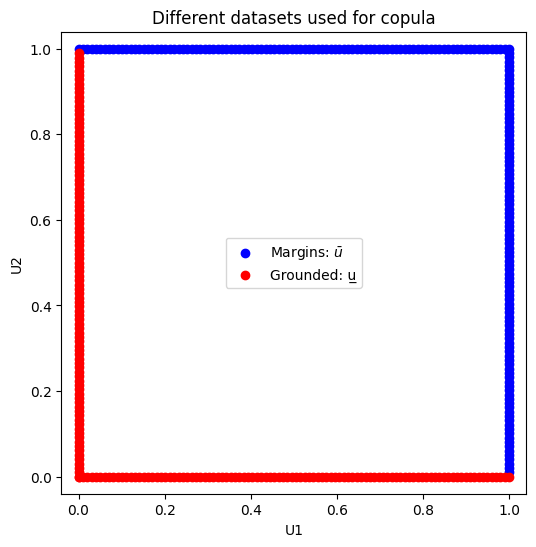

In [78]:

num_points = 100
bottom = np.linspace([0, 0], [1, 0], num_points)
right = np.linspace([1, 0], [1, 1], num_points)[1:]
top = np.linspace([1, 1], [0, 1], num_points)[1:]
left = np.linspace([0, 1], [0, 0], num_points - 1)[1:]

margins = np.vstack((right, top))
grounded = np.vstack((bottom, left))




plt.figure(figsize=(6, 6))
plt.scatter(margins[:, 0], margins[:, 1], color='blue', alpha=1, label= r'Margins: $\bar{u}$')
plt.scatter(grounded[:, 0], grounded[:, 1], color='red', alpha=1, label='Grounded: u̲')
plt.xlim(-0.04, 1.04)
plt.ylim(-0.04, 1.04);
plt.xlabel('U1')
plt.ylabel('U2')
plt.legend()
plt.title('Different datasets used for copula')




In [75]:
np.sqrt(1000)

np.float64(31.622776601683793)

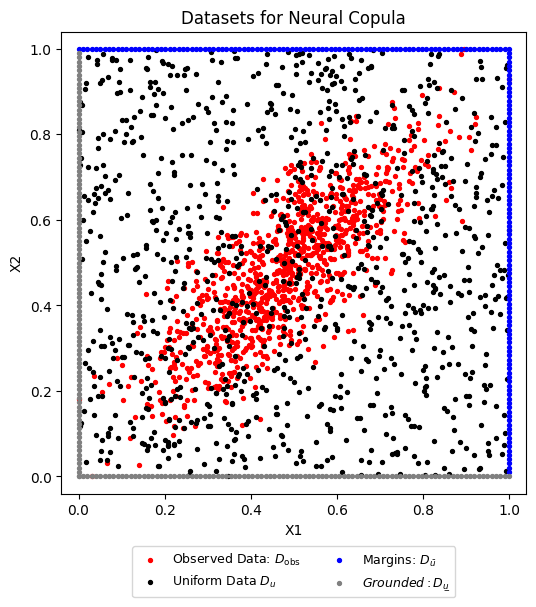

In [114]:

## Create observed values
corrMat = np.array([[1, 0.8], [0.8, 1]])
A = np.linalg.cholesky(corrMat)
np.random.seed(0)
Z = np.random.standard_normal((1000, 2))
X = (A @ Z.T).T


x_normalized = np.zeros((1000, 2))
x_normalized[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
x_normalized[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

# U_uncorrelated = norm.cdf(Z)
U_correlated = norm.cdf(X)

U_uniform = np.zeros(X.shape)
U_uniform = norm.cdf(Z)
# U_uncorrelated = norm.cdf(Z)
U_correlated = norm.cdf(X)

# U_uniform = np.linspace(0, 1, 31)
# U1, U2 = np.meshgrid(U_uniform, U_uniform)


plt.figure(figsize=(6, 6))
plt.scatter(x_normalized[:, 0], x_normalized[:, 1], color='red', alpha=1, label=r'Observed Data: $D_{\mathrm{obs}}$ ',s=8)
plt.scatter(U_uniform[:, 0], U_uniform[:,1], color='black', alpha=1, label='Uniform Data $D_u$', s=8)
plt.scatter(margins[:, 0], margins[:, 1], color='blue', alpha=1, label= r'Margins: $ D_{\bar{u}}$', s=8)
plt.scatter(grounded[:, 0], grounded[:, 1], color='grey', alpha=1, label=r'$Grounded: D_{u̲}$', s=8)
plt.xlim(-0.04, 1.04)
plt.ylim(-0.04, 1.04);
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=9, ncol=2)
plt.title('Datasets for Neural Copula')


plt.show()
